In [41]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.cluster import KMeans
sb.set()

# Introduction
With rapid advancements in the digital age, there has been a rapid advancement in healthcare technology. Yet, diabetes has recently emerged as the new unseen pandamic. This is because of many people having a sendatary lifestylye due to multiple factors such as the lack of time, motivation or simply the lack of sports and leisure facilities. According to the IDF, 537 million adults (20-79 years) are living with diabetes - 1 in 10. This number is predicted to rise to 643 million by 2030 and 783 million by 2045. 

With the alarming increase in the rate of patients with diabetes, it is very important for the early detection of diabetes. This is because with early diagnosis proper treatment can be assesed in order to avoid further complications of the disease. Numerous studies have been conducted on disease prediction, including diagnosis, prediction, categorization, and treatment.

This project delves into the realm of predictive modeling for diabetes, employing techniques from both machine learning and data analysis. Our aim is to develop a robust model capable of identifying individuals at high risk of developing diabetes, using certain attributes, for effective prevention and management strategies.

# Data Acquisition

In [42]:
diabetes_data = pd.read_csv('diabetes2.csv')

In [43]:
diabetes_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Info about each column

#### Pregnancies
Number of pregnancies the individual has had.

#### Glucose
Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test.

#### BloodPressure
Diastolic blood pressure (mm Hg).

#### SkinThickness
Thickness of skinfold (mm) at the triceps.

#### Insulin
2-Hour serum insulin (mu U/ml).

#### BMI
Body mass index (weight in kg/(height in m)^2)

#### DiabetesPedigreeFunction
Diabetes pedigree function, which represents the likelihood of diabetes based on family history.

#### Age
Age of the individual (years).

#### Outcome
Binary label indicating whether the individual has diabetes (1) or not (0).

In [5]:
#info about the data
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- The above data has no null values
- It has all numerical data that can be transformed if needed

In [7]:
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- It can be seen from this dataset that there are more 'Negative' Outcomes than 'Positive' ones

### Data visualisation

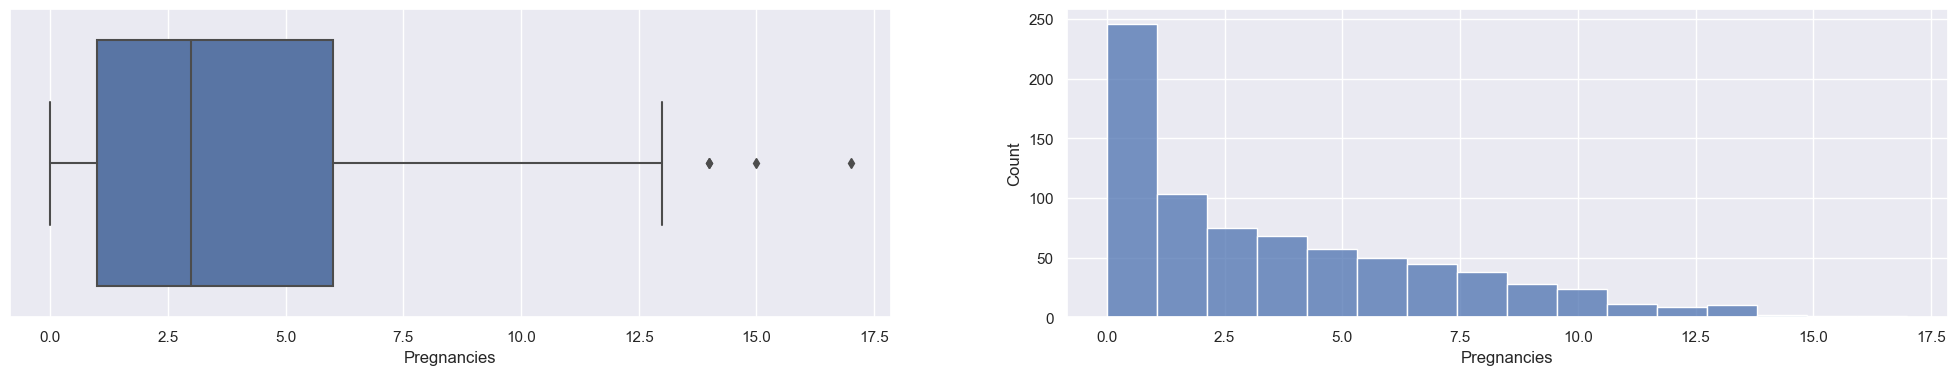

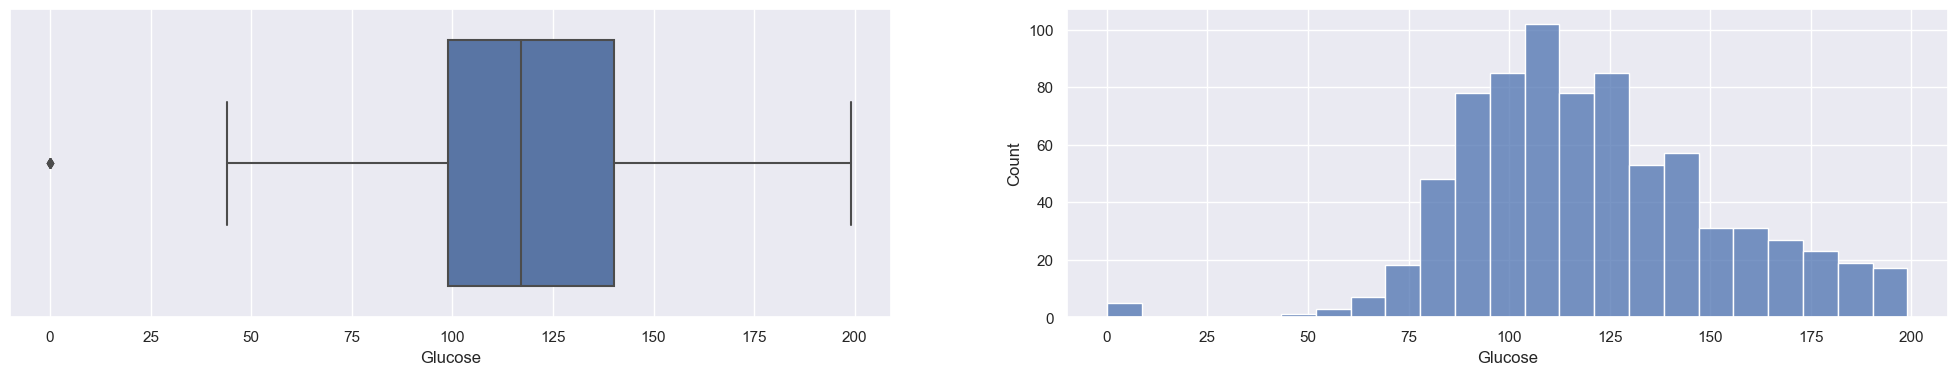

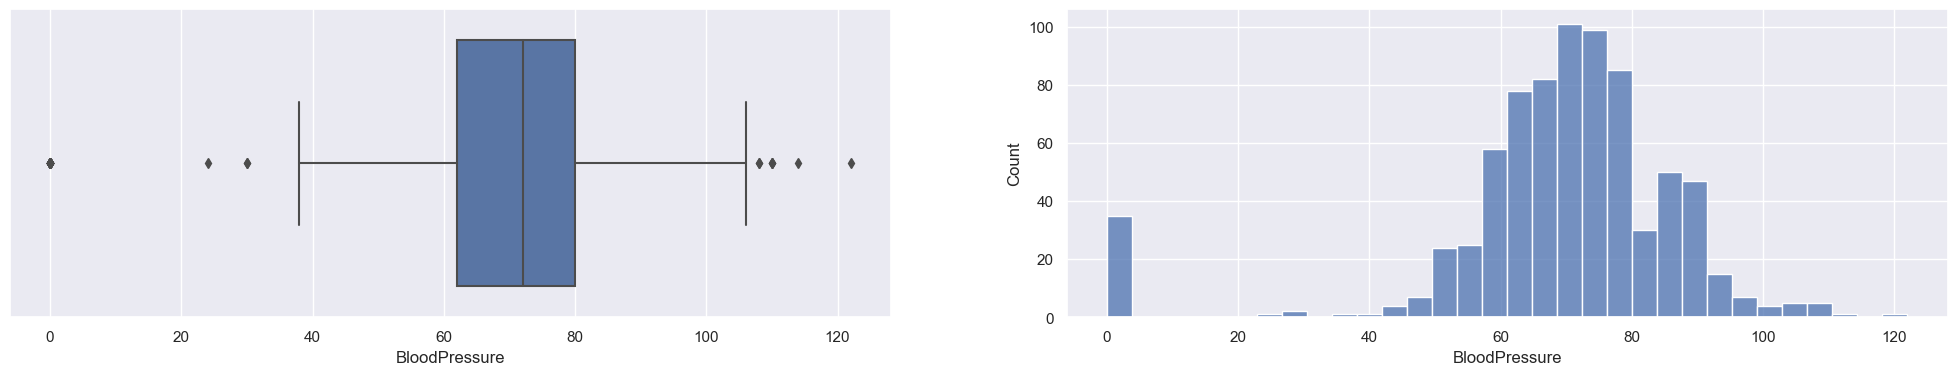

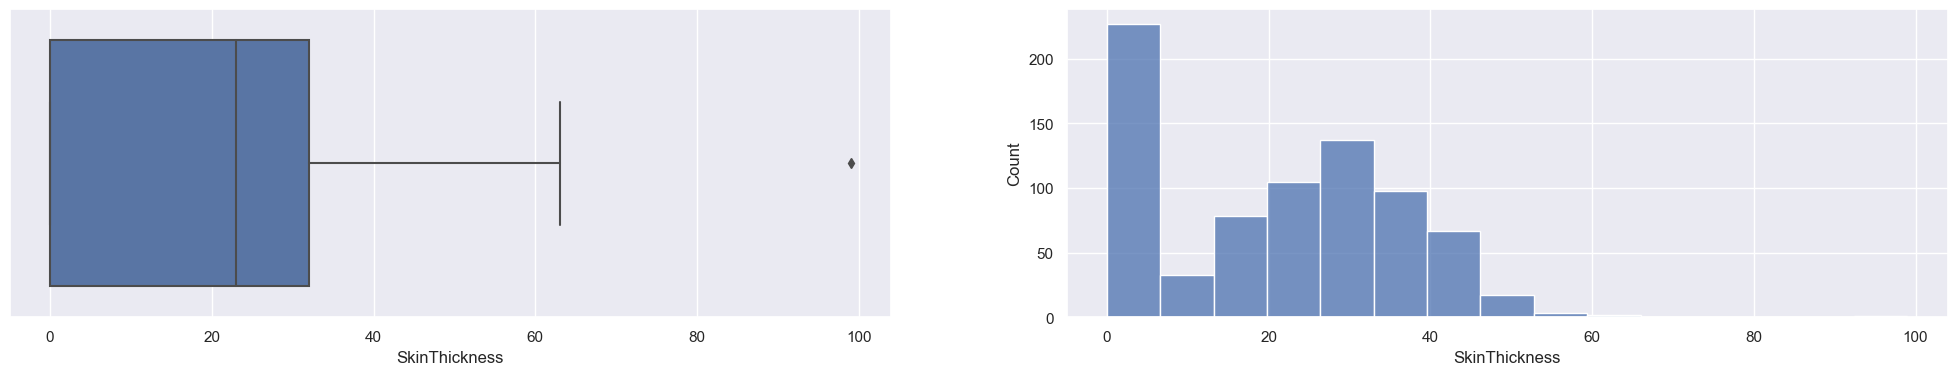

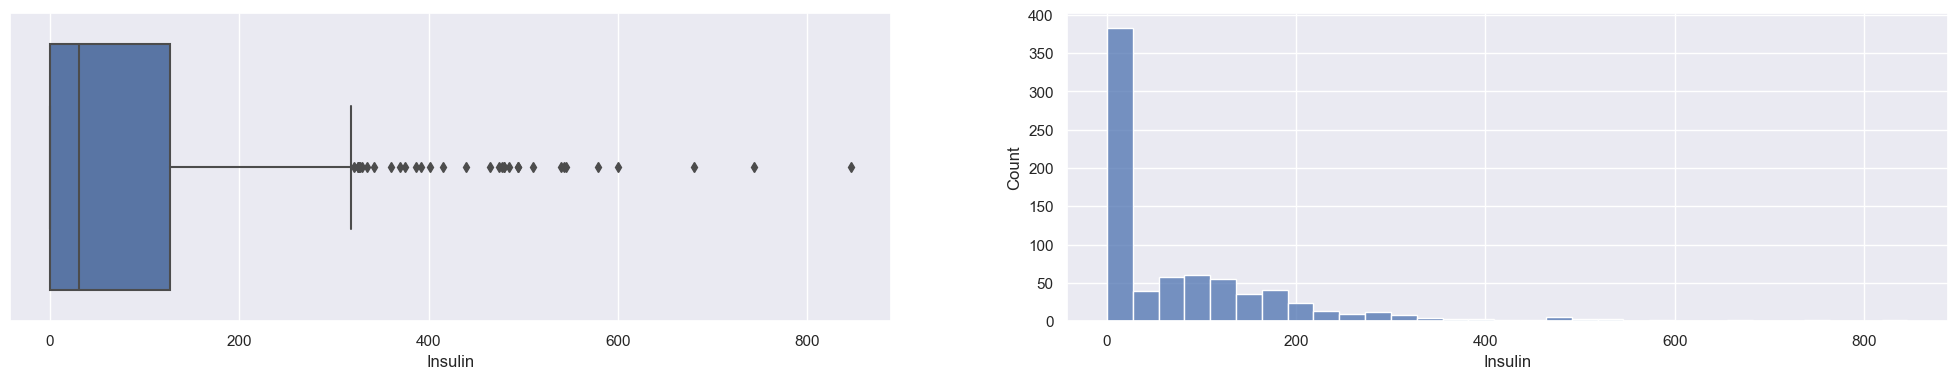

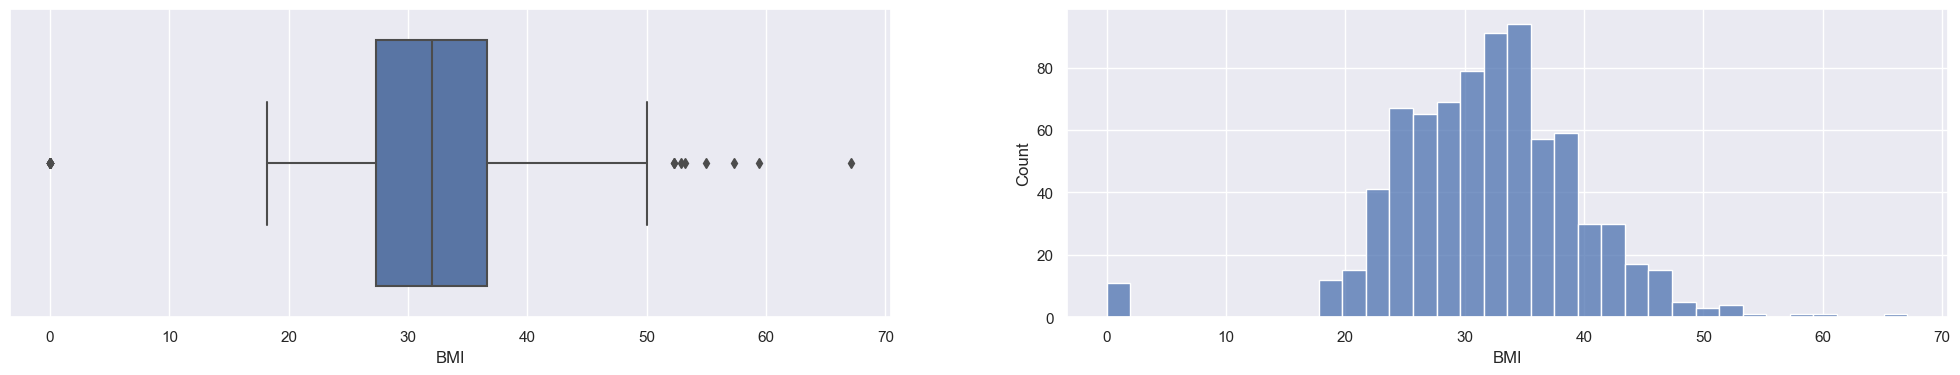

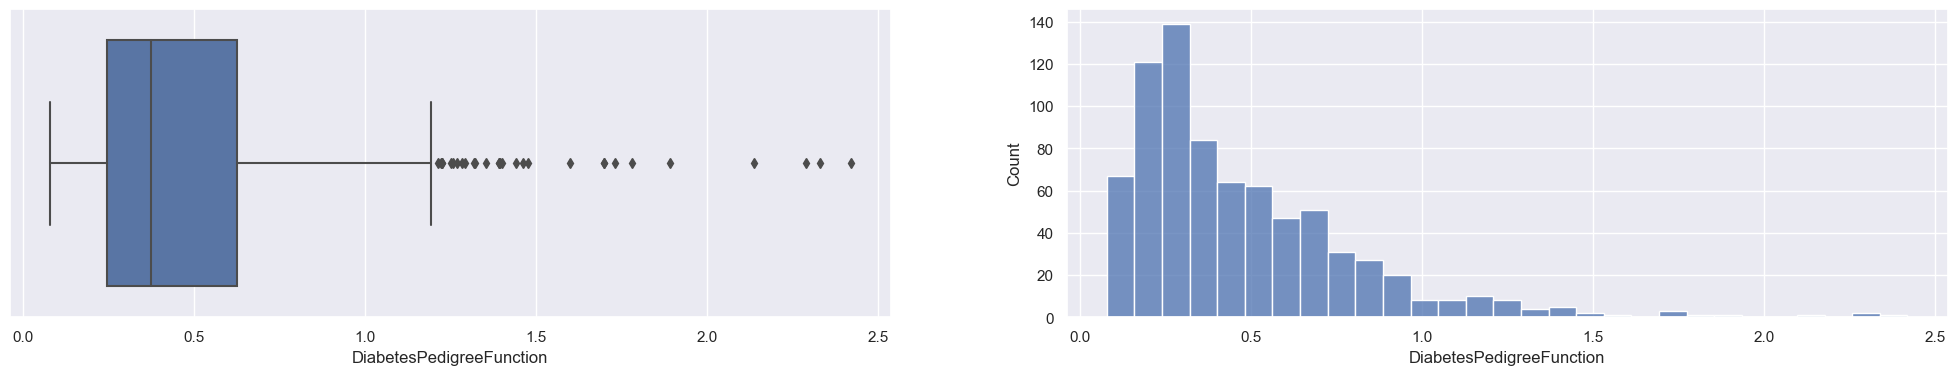

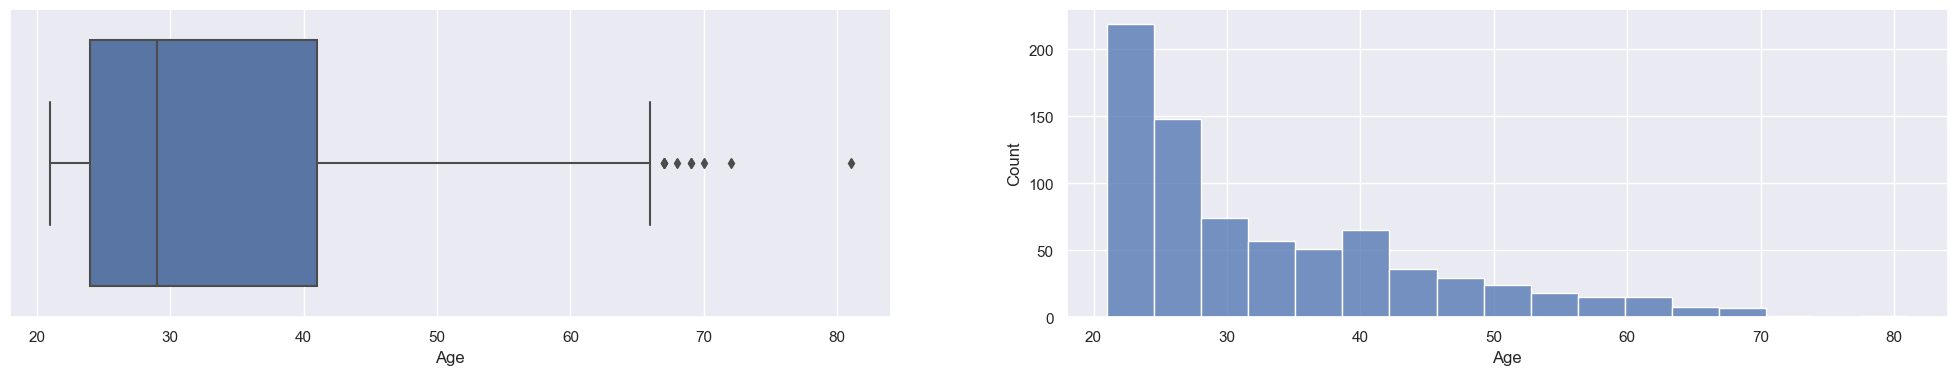

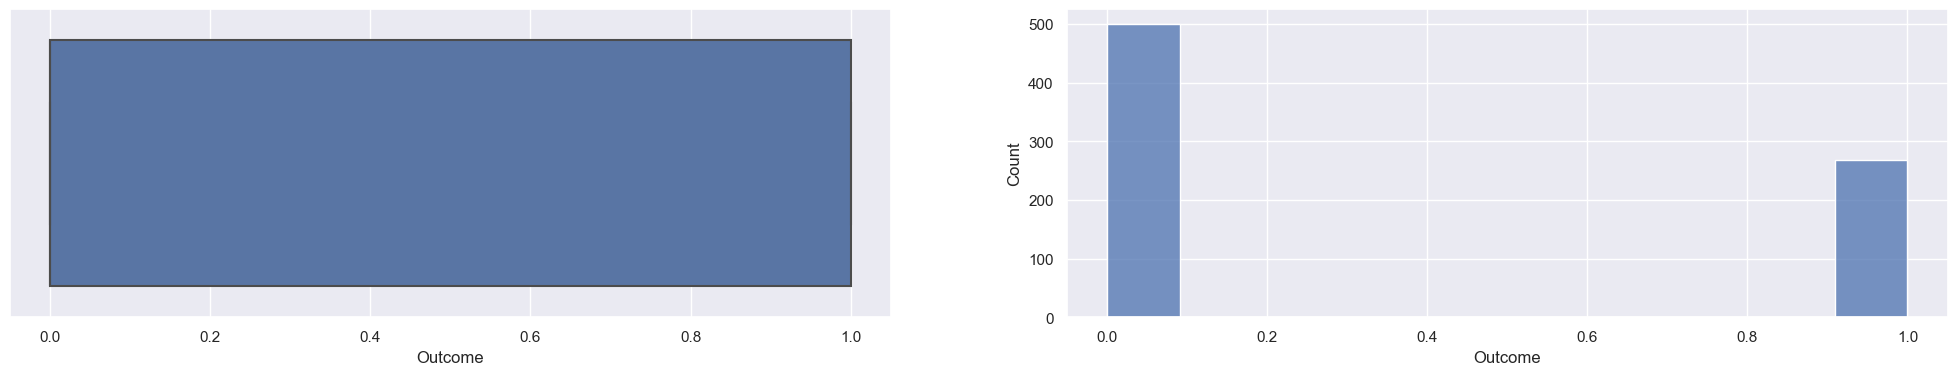

In [9]:
#Uni-variate description
def Univariate_boxplot (data,column):
    f, axes = plt.subplots(1, 2, figsize=(25, 4))
    sb.boxplot(x = column,data = data, orient = "h", ax = axes[0])
    sb.histplot(data = data,x = column, ax = axes[1])
for columns in diabetes_data :
    Univariate_boxplot (diabetes_data,columns)

- Glucose, BloodPressure and BMI has a more normal distribution.
- Pregnancies, SkinThickness, DiabetesPedigreeFunction and Age are skewed positively.
- Outcome had no distribution of any sort.
- BMI, Insulin and DiabetesPedigreeFunction have numerous outliers in their boxplot compared to the other variables.

# Exploratory Analysis 

<Axes: >

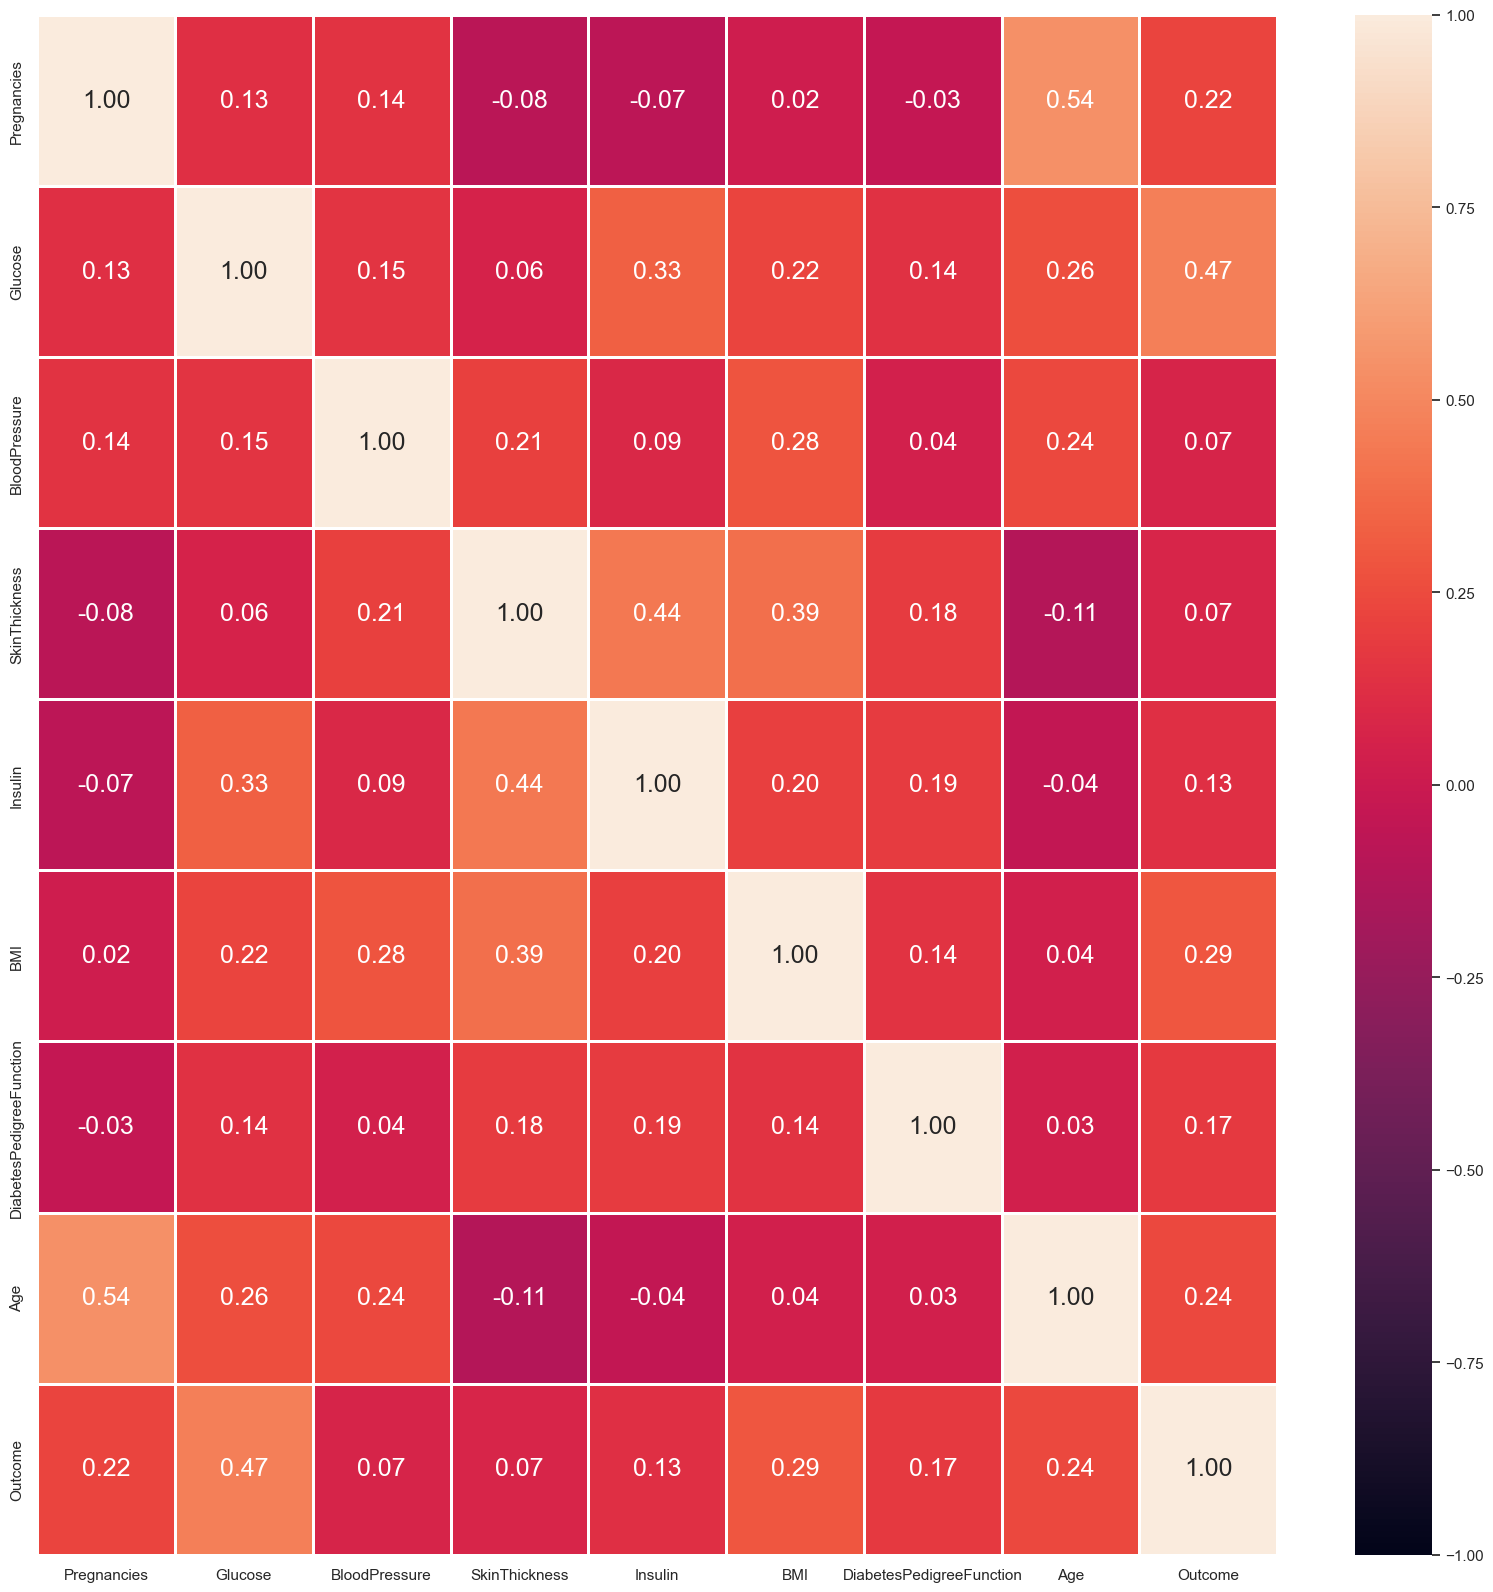

In [10]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(diabetes_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18})

In [11]:
diabetes_data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

- From the correlation matrix, the Outcome have a slightly higher positive correlations to the variables, Glucose, BMI and Age.
- Their correlation coefficient is 0.47, 0.29 and 0.24 respectively.

### Relationship of other variables within each other
***
- We decided to explore the relationship of other variables through SkinThickness, as this variable has a higher correlation to all variables compared to others.


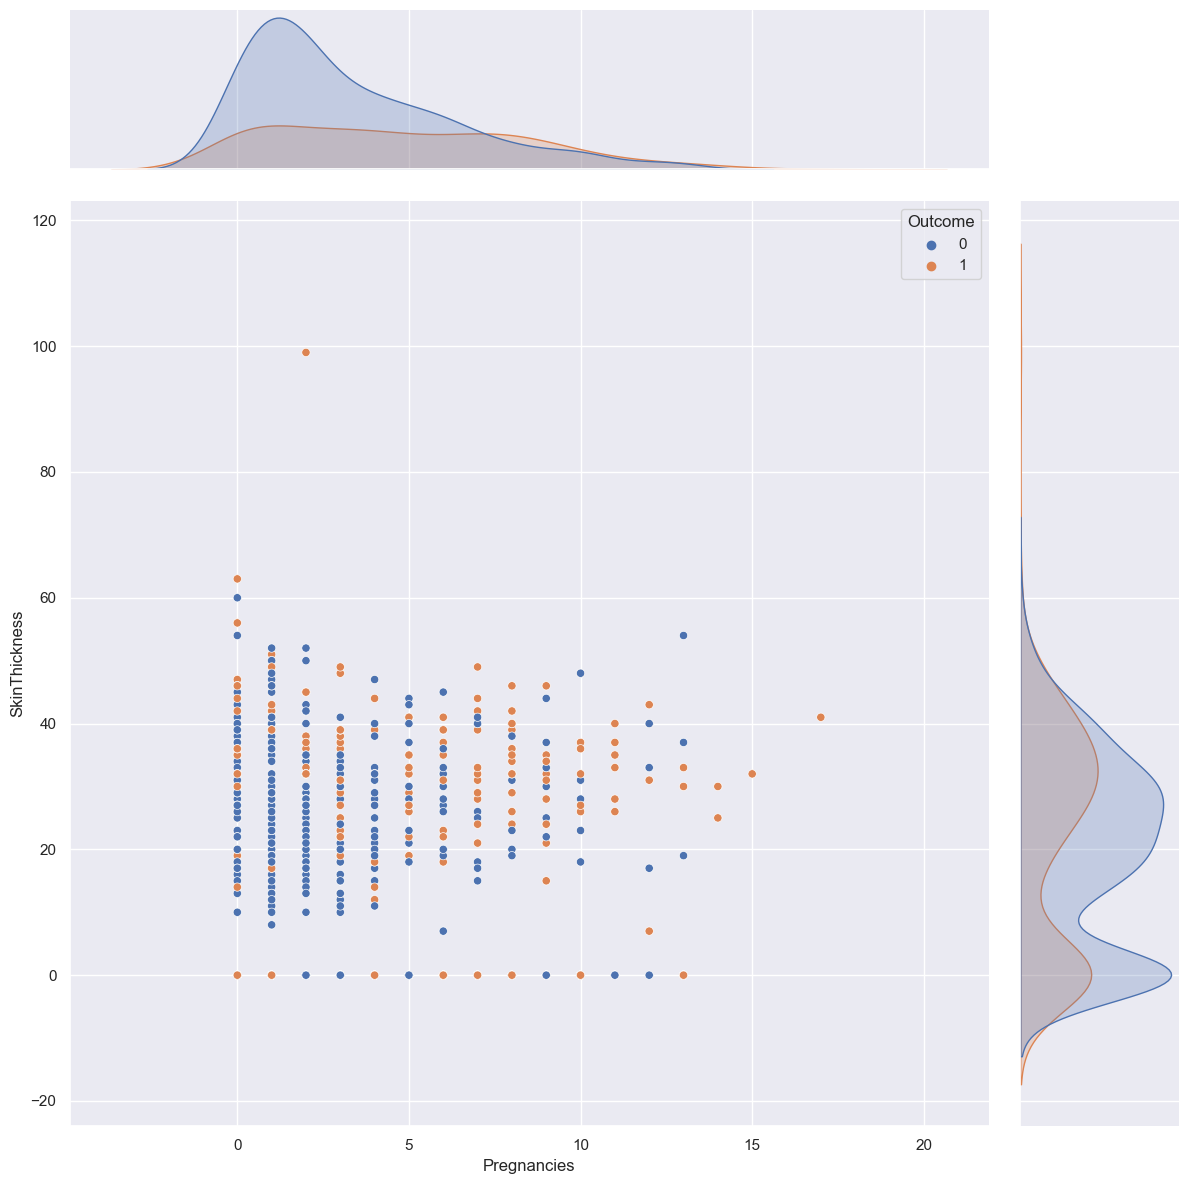

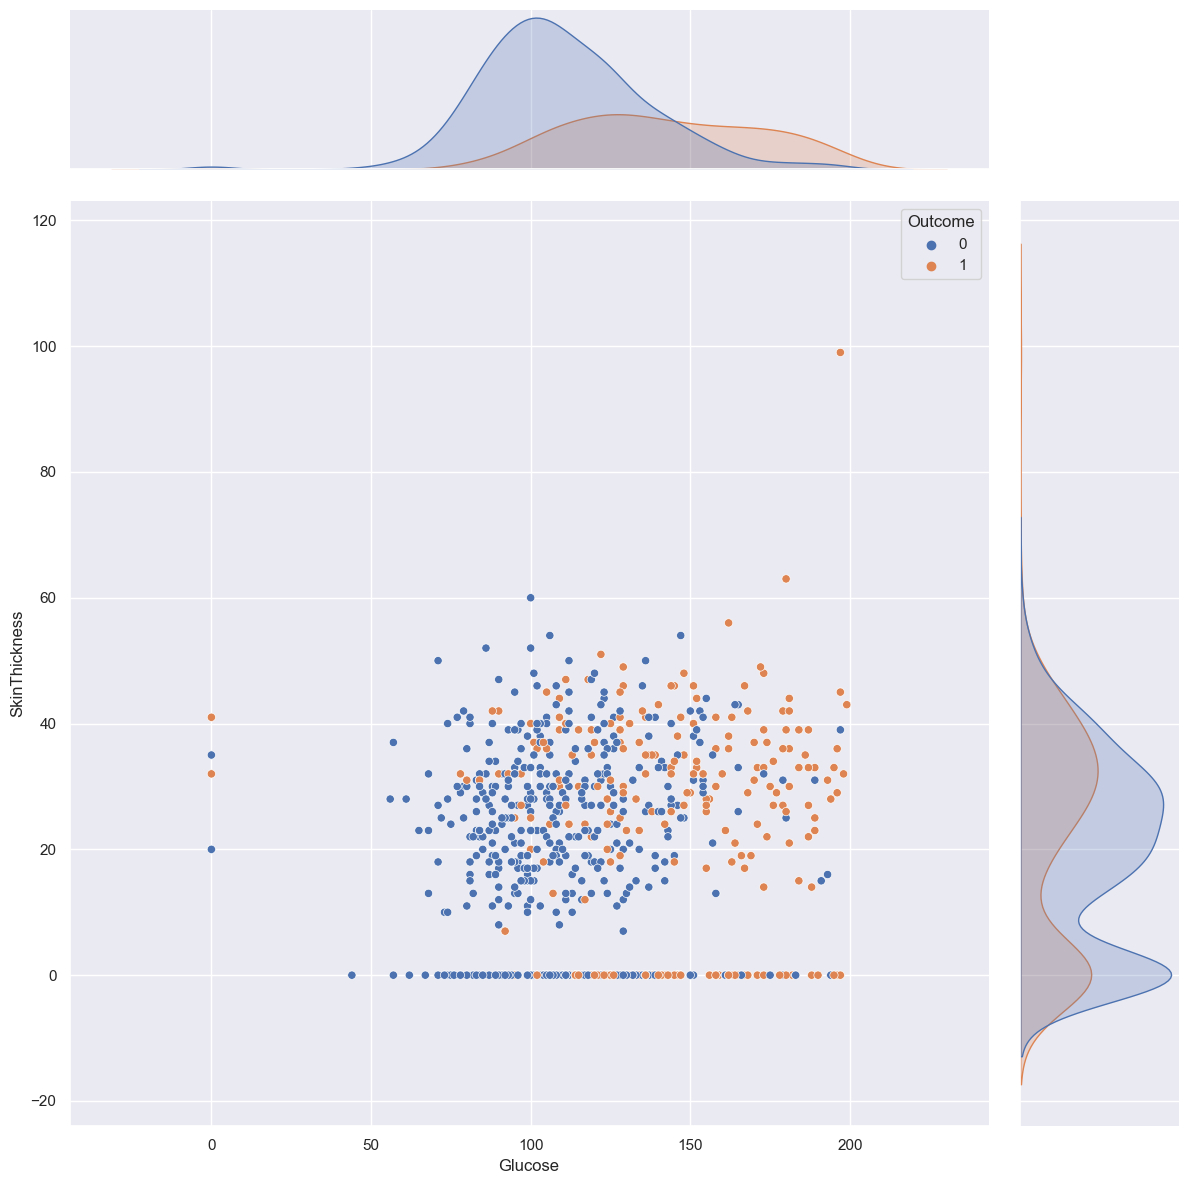

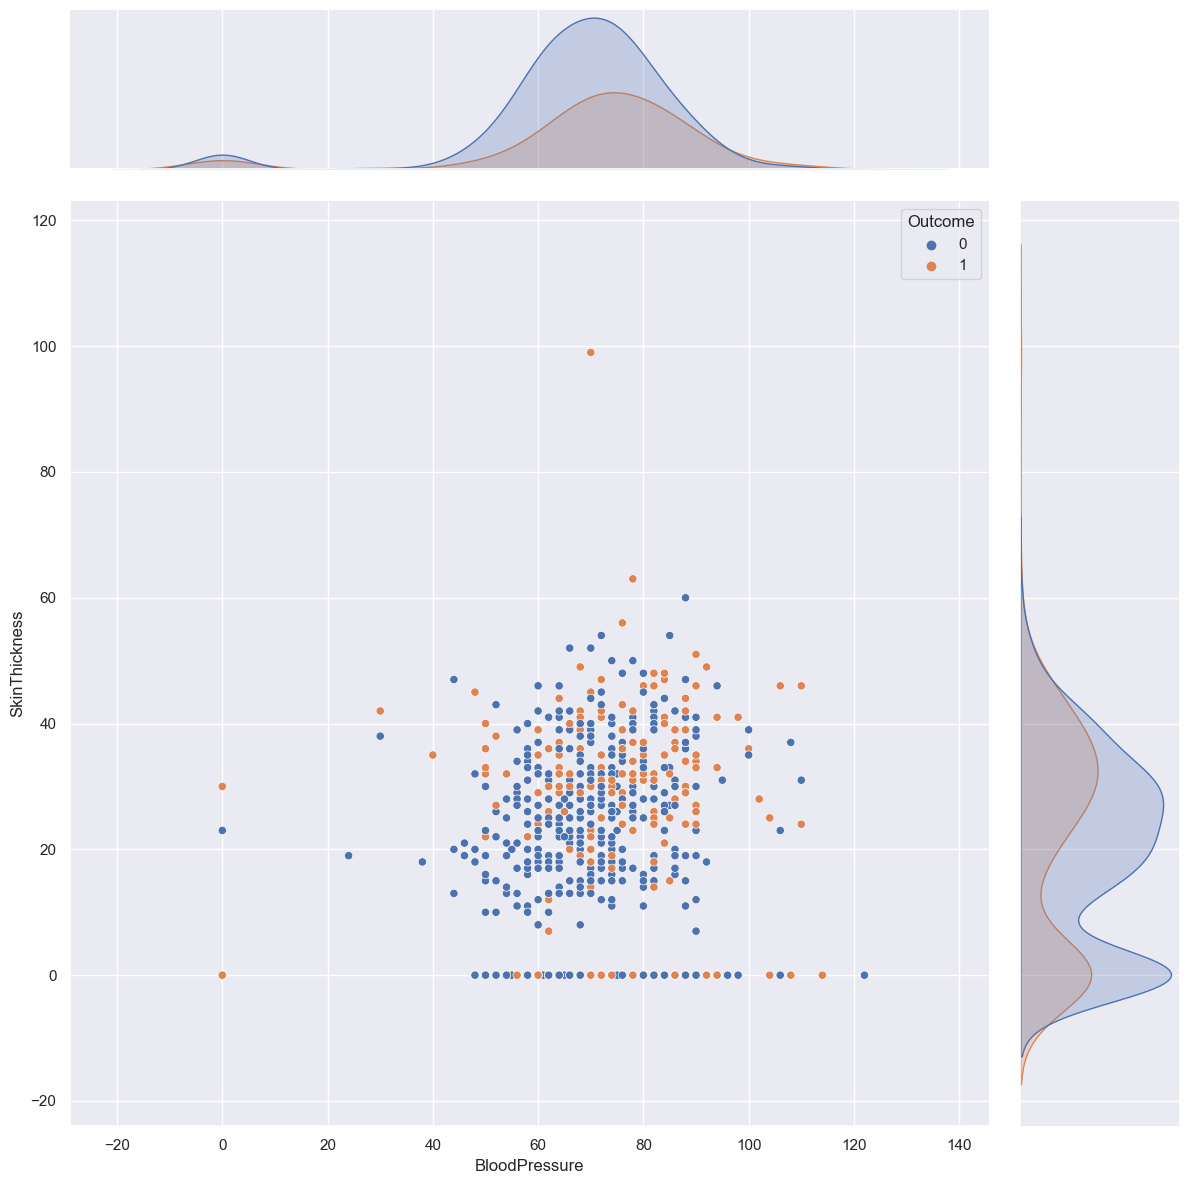

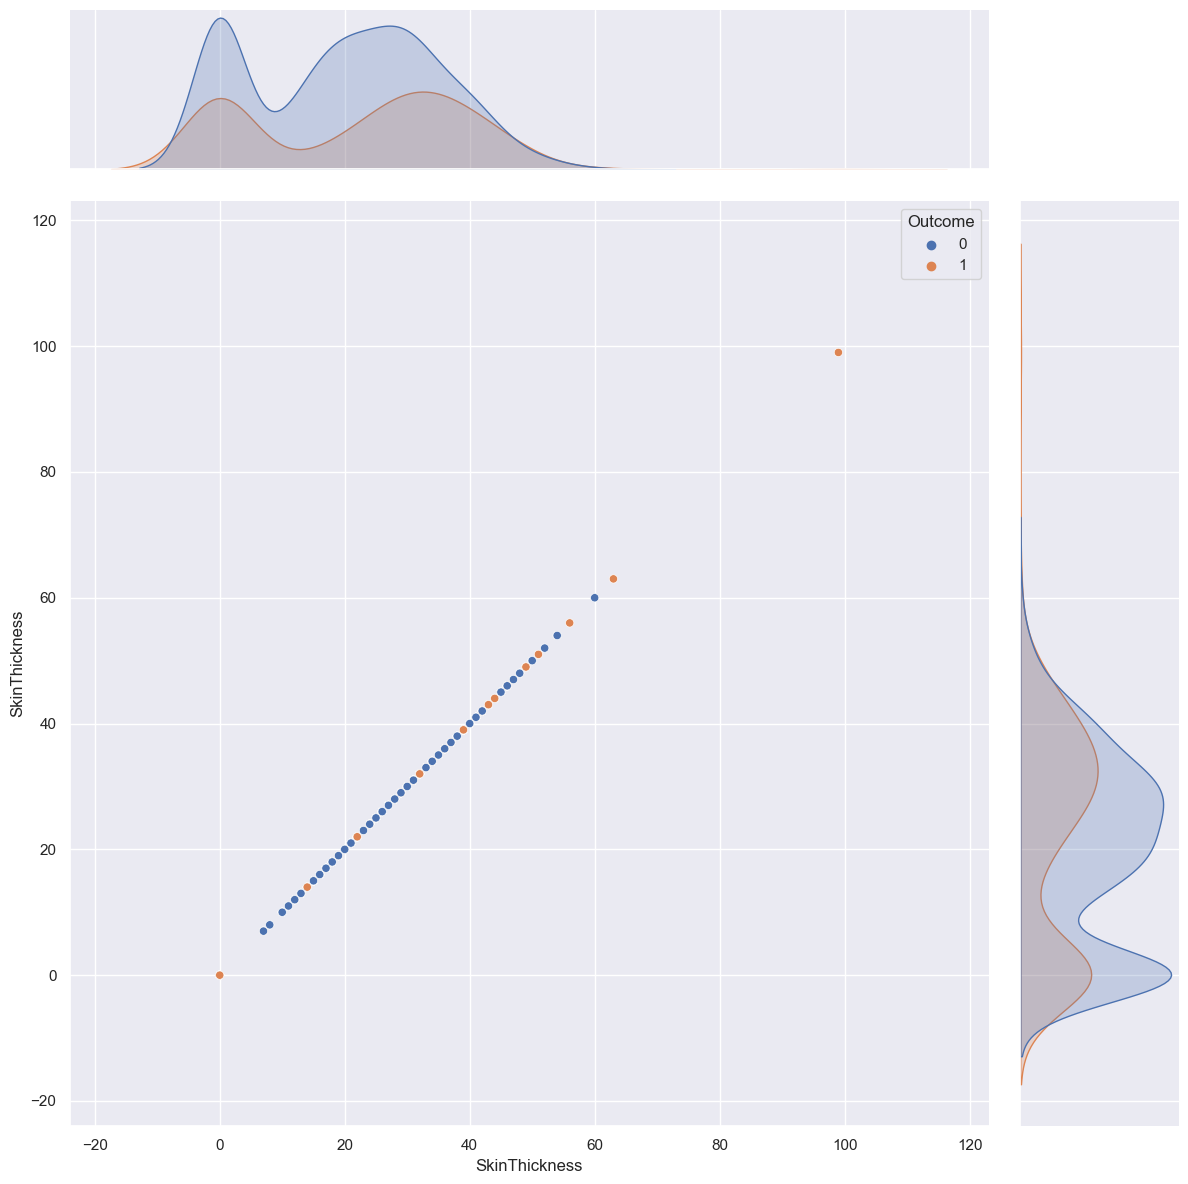

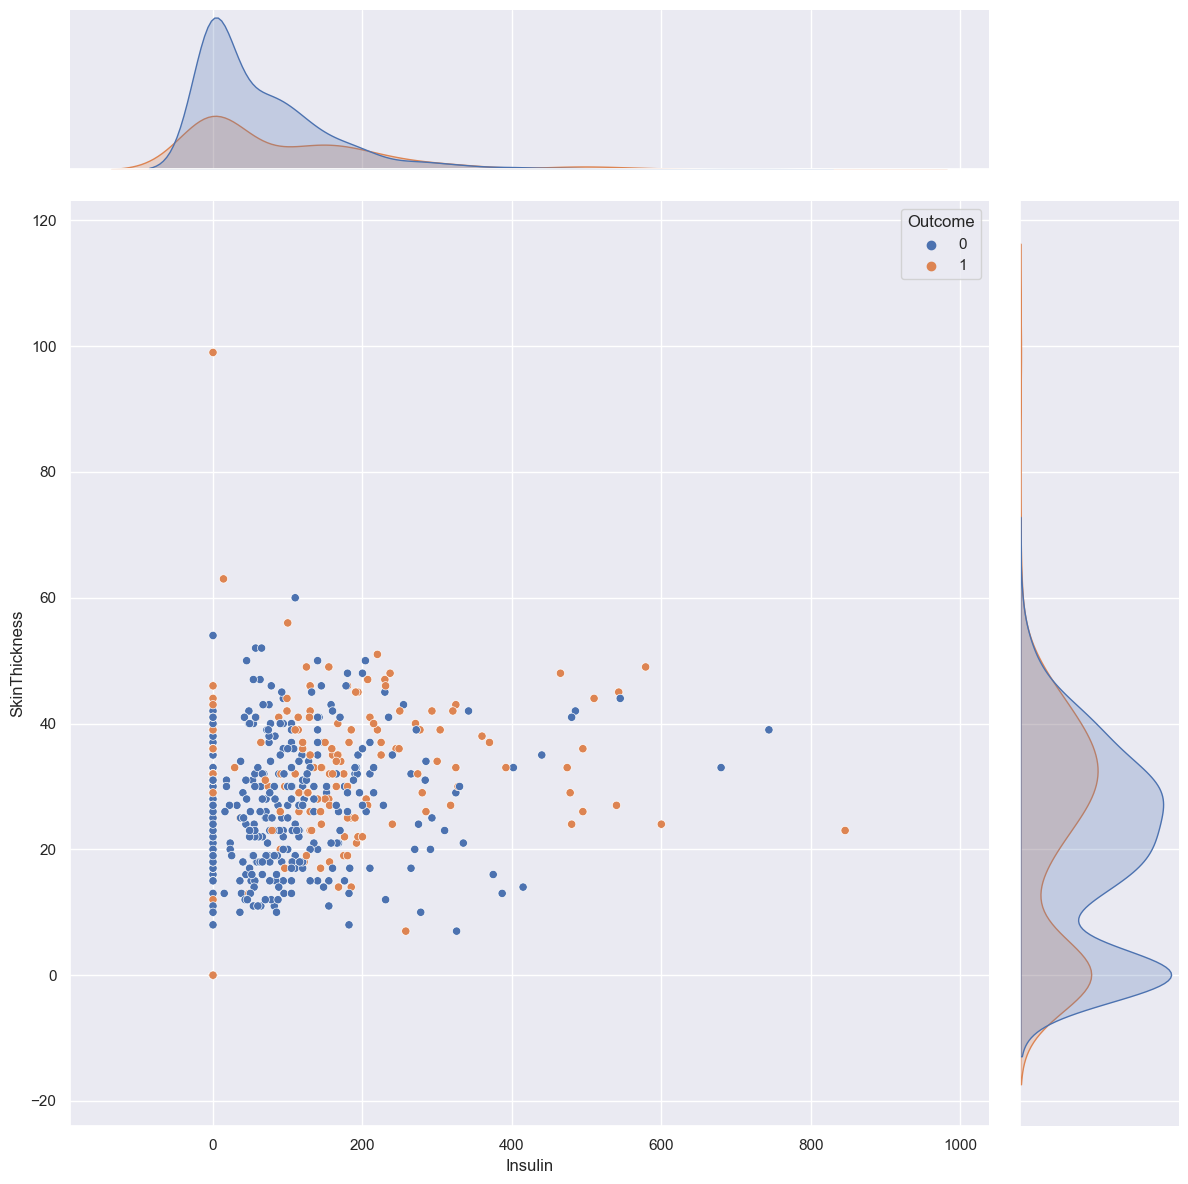

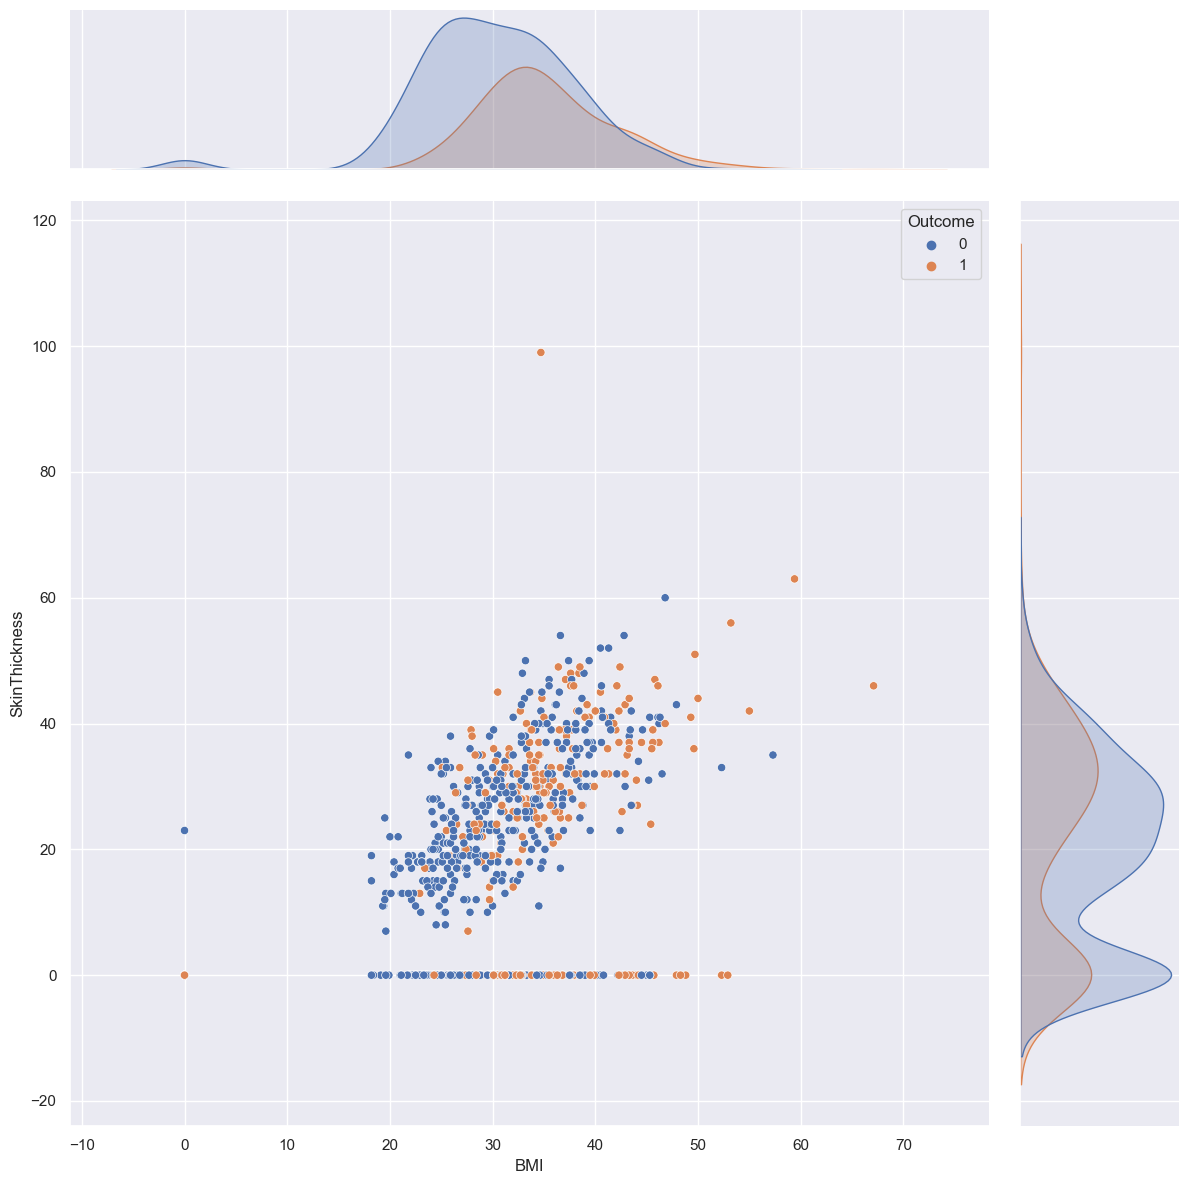

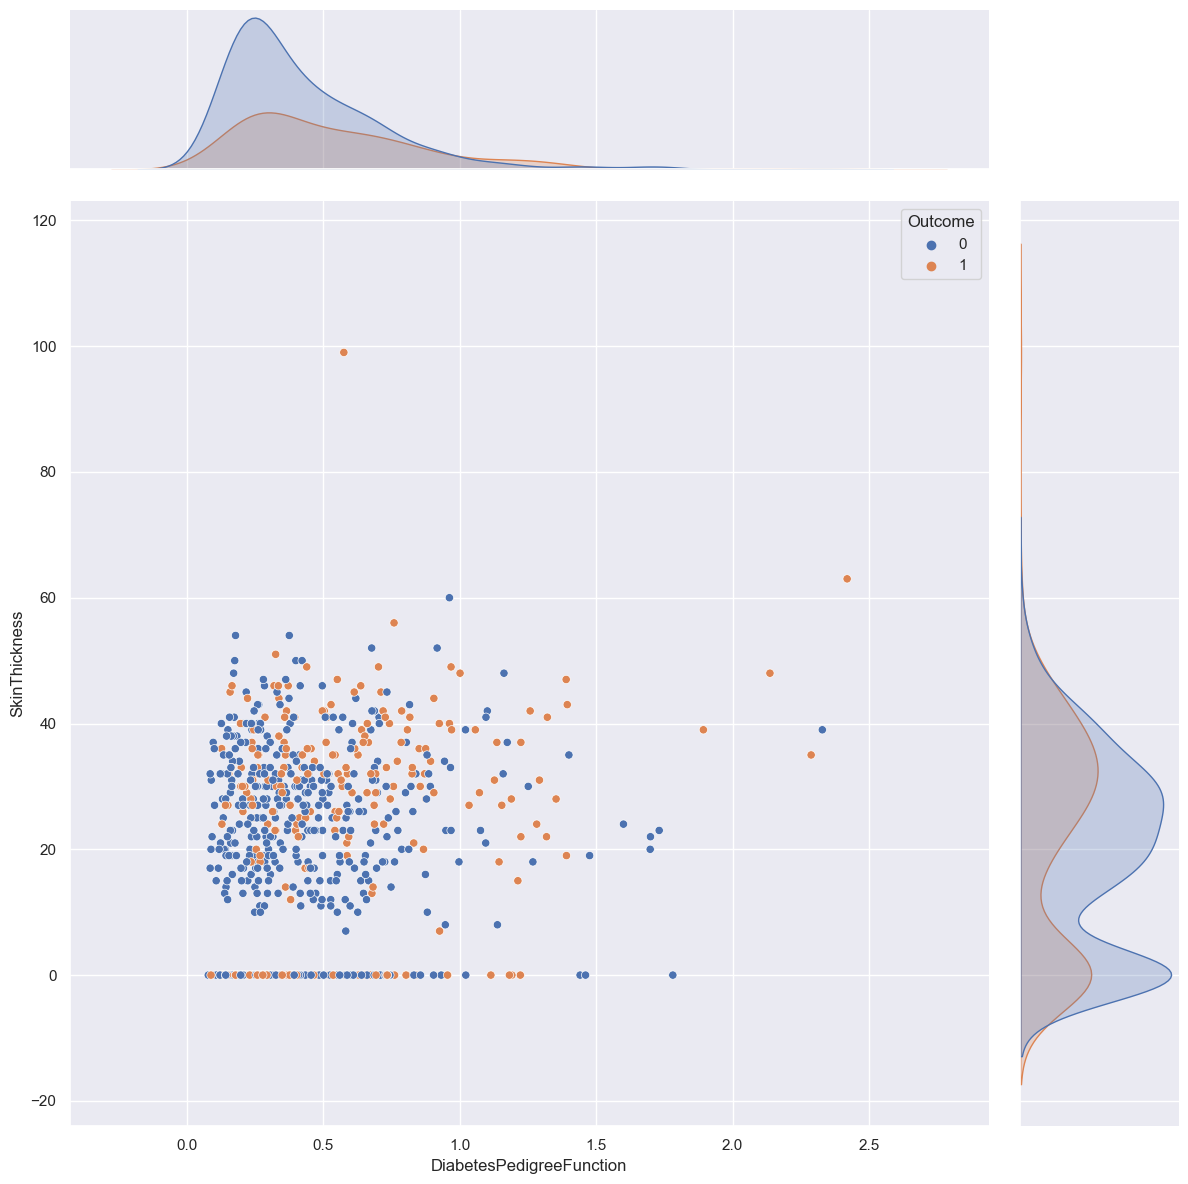

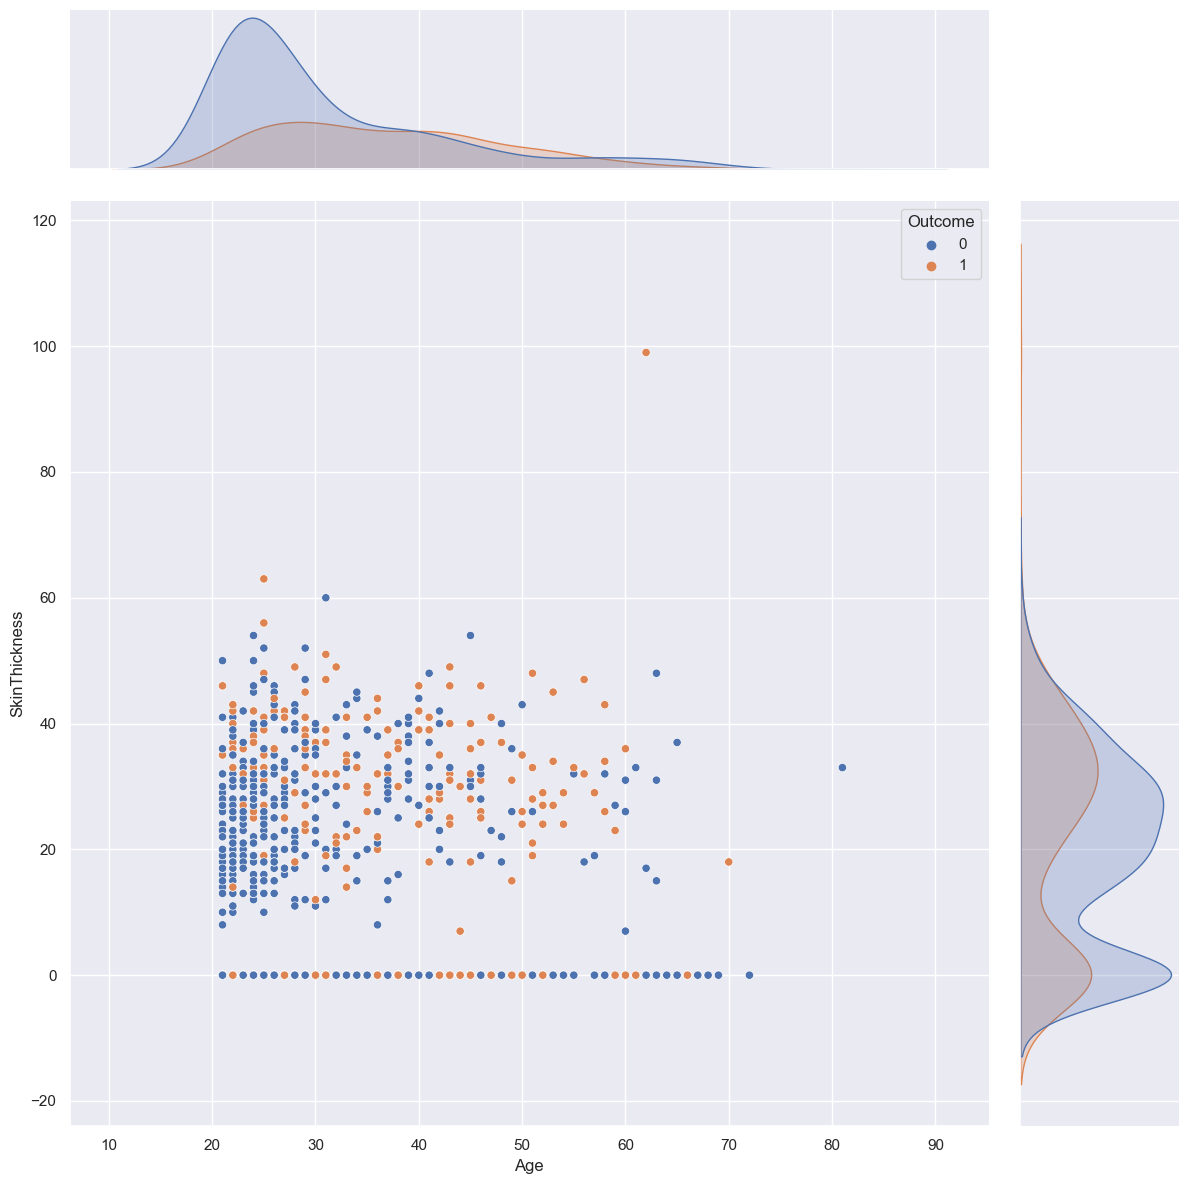

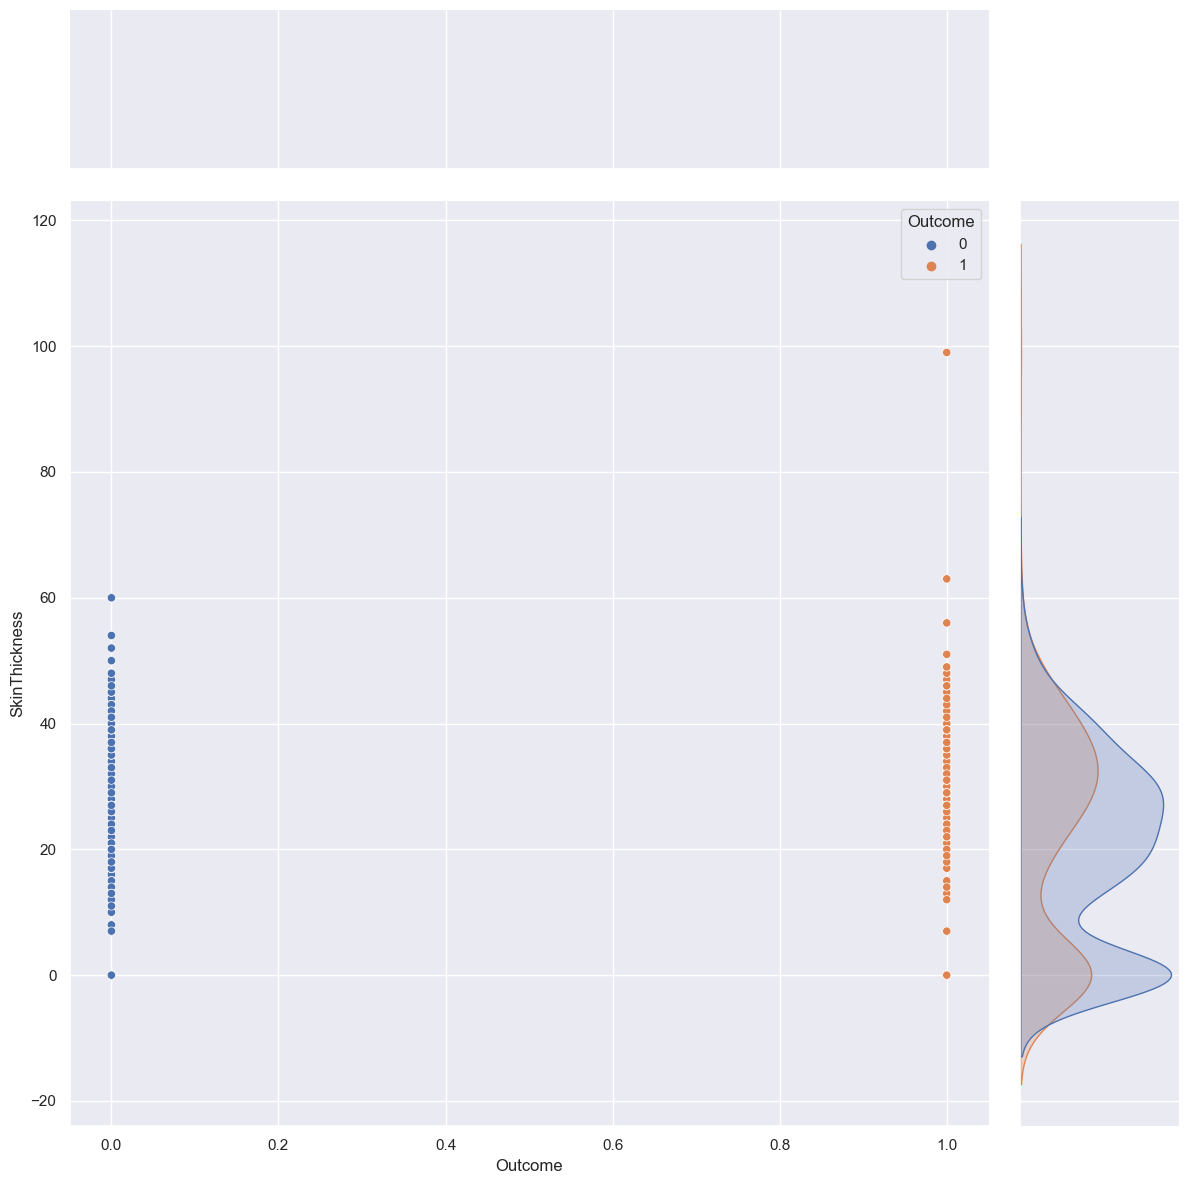

In [12]:
for columns in diabetes_data :
    sb.jointplot(data = diabetes_data, x = columns, y = 'SkinThickness', hue = 'Outcome', height = 12)


- From the joint plots shown, the graphs of SkinThickness against Glucose, BloodPressure, Insulin, BMI, DiabetesPedigreeFunction, Age show that they have some positive correlation to each other which can be seen. Yet, interestingly Outcome and SkinThickness only has a correlation coefficient of 0.07.

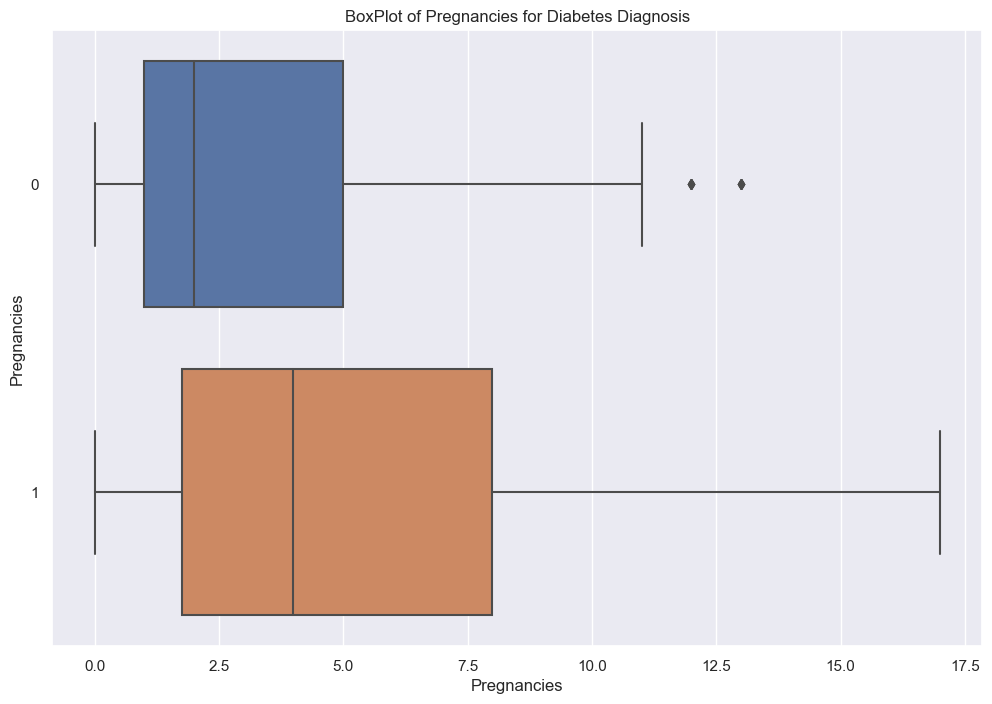

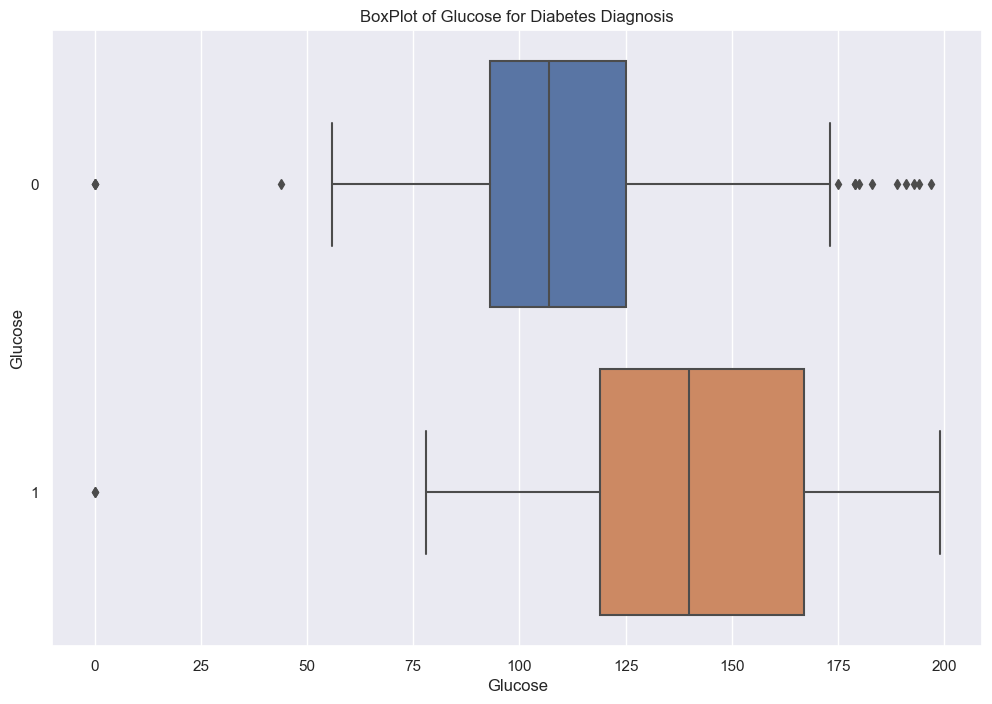

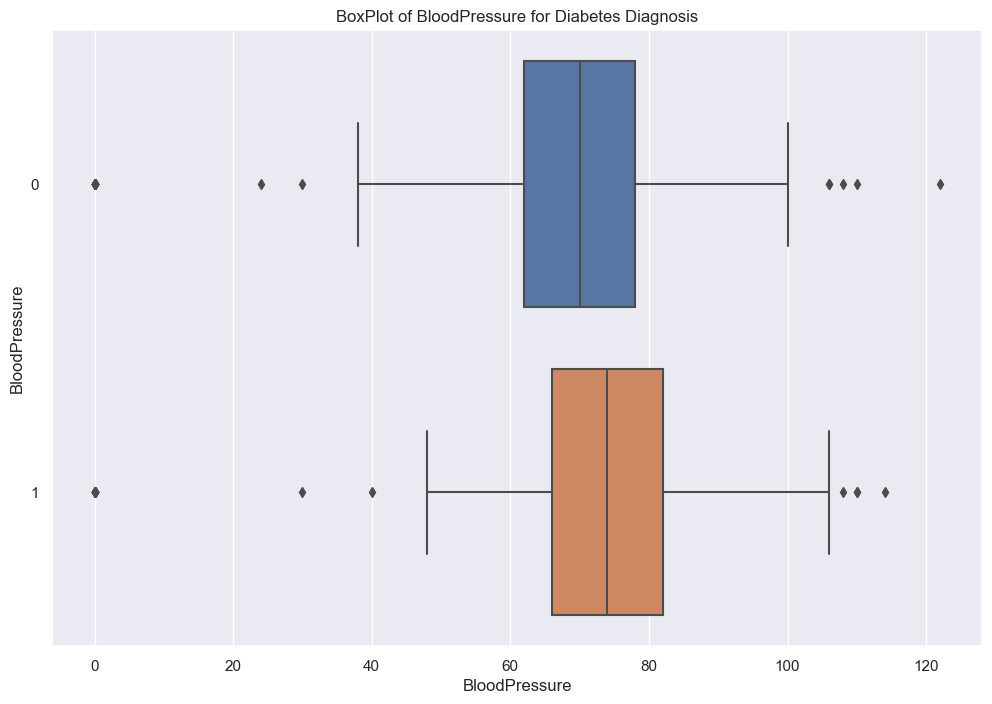

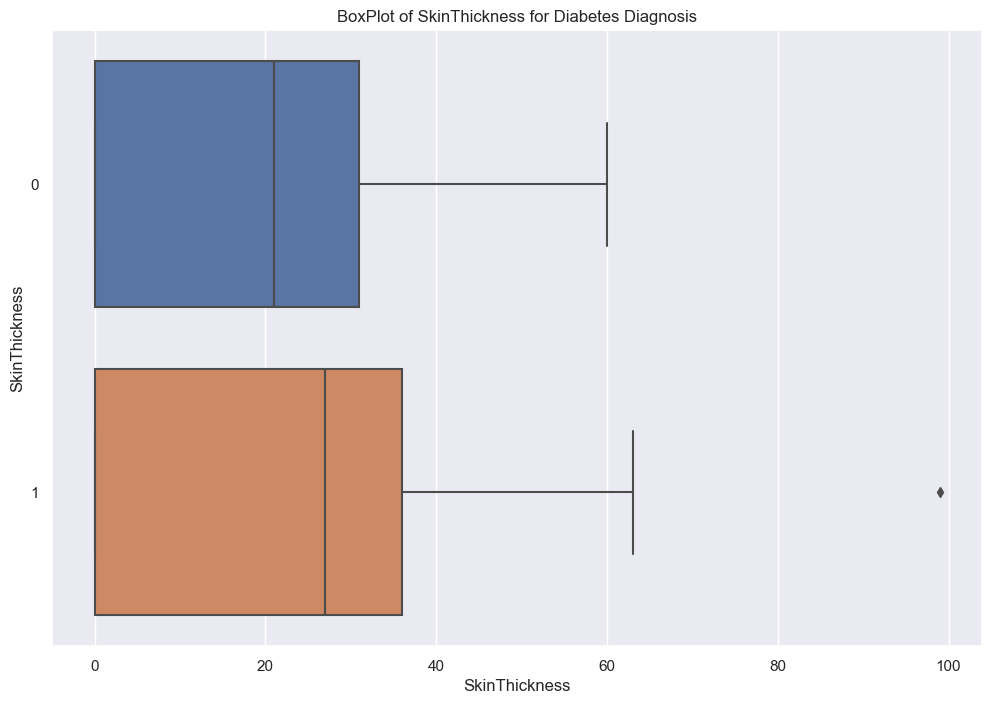

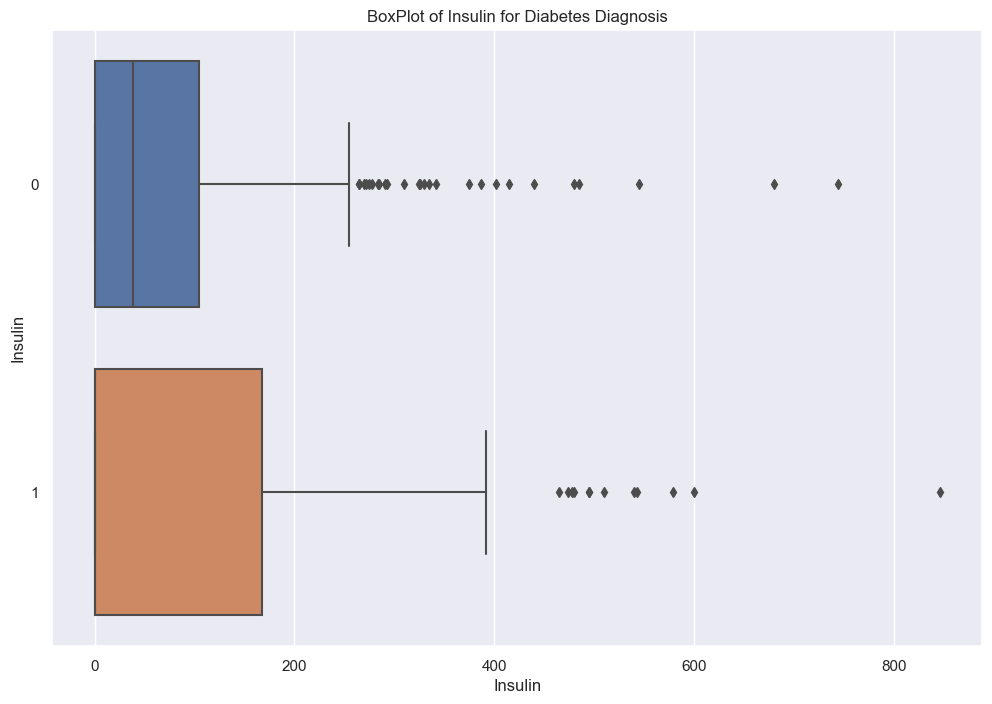

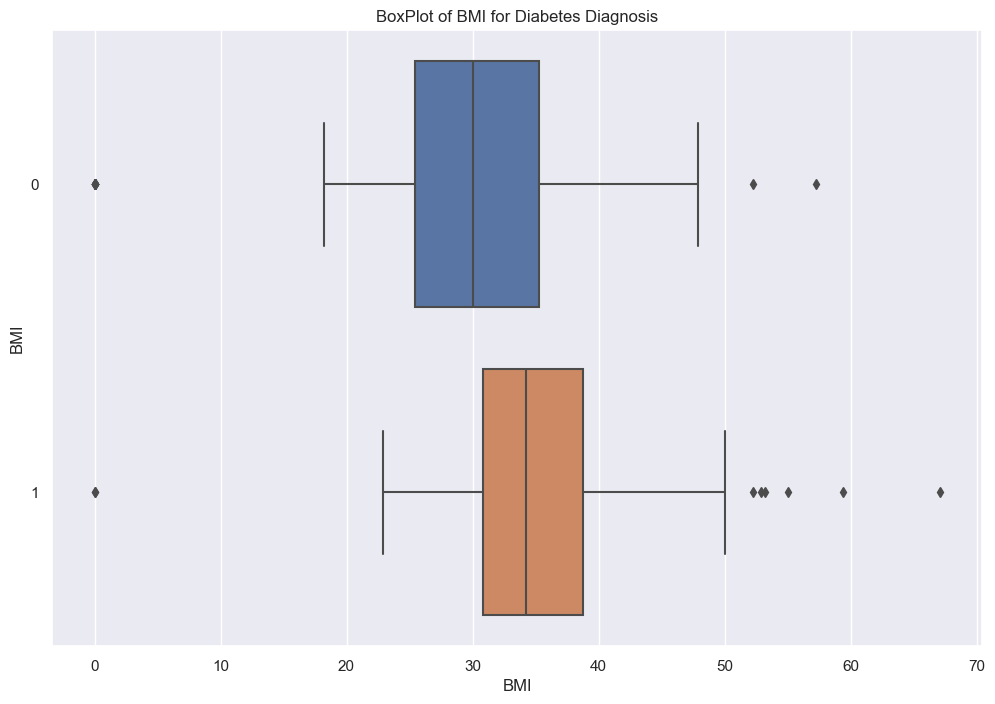

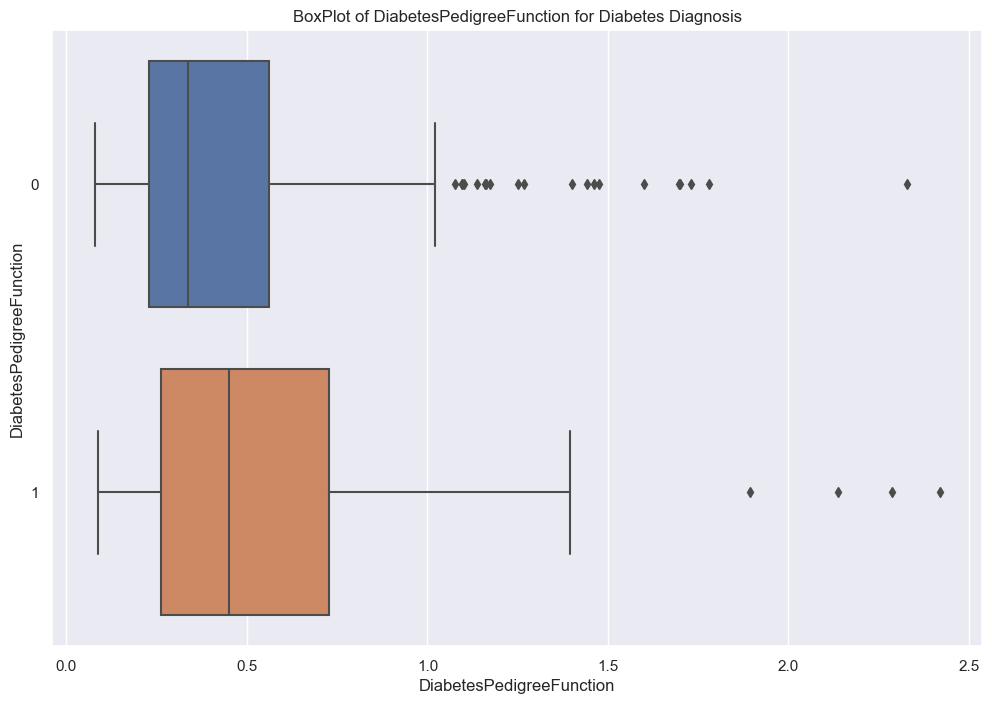

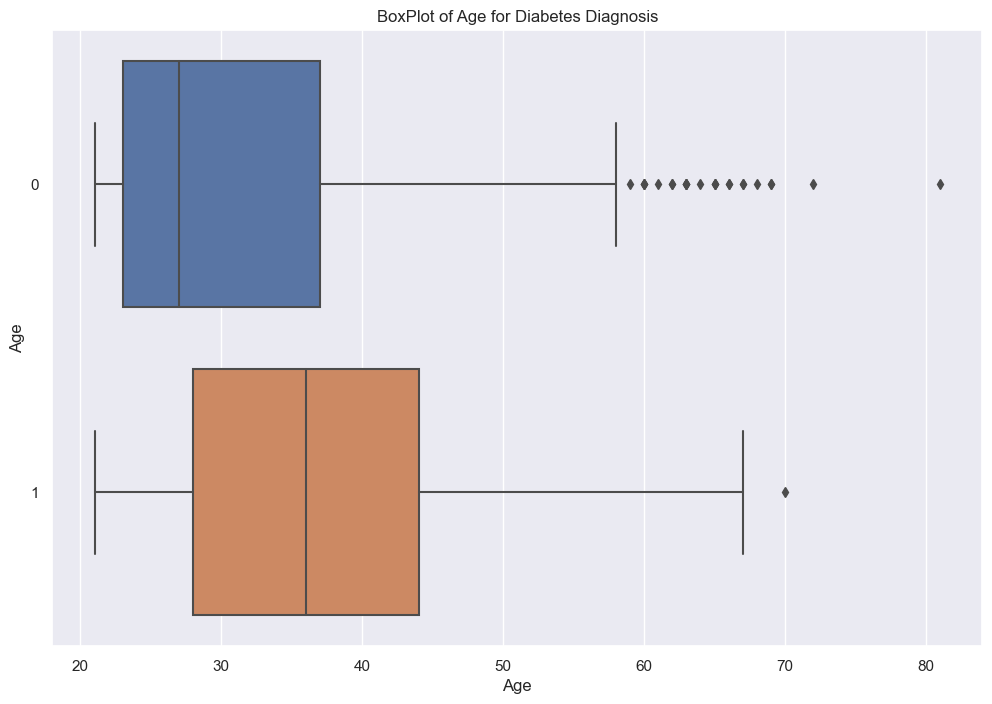

In [146]:
#Relationship of variables
feature_columns = diabetes_data.columns.drop('Outcome')
for column in feature_columns:
    f = plt.figure(figsize=(12, 8))
    sb.boxplot(x=column, y='Outcome', data=diabetes_data, orient="h")
    plt.title(f'BoxPlot of {column} for Diabetes Diagnosis')
    plt.ylabel(f'{column}')
    plt.show()

### Based on the boxplots shown, we can see that :
***
- Outcome of '1'has a higher median of Pregnancies.
- For Outcome of '1' ,the median of Glucose is on the higher side compared to Outcome of '0'.
- The median BMI for those with diabetes is higher compared to those with no diabetes.
- The meadian of the Age of those with diabetes is a lot higher compared to those that don't, but it may be due to outliers.
- The spread of Glucose, Insulin, Age and DiabetesPedigreeFunction have a wider spread, indicating theres is more variability compared to other variables.

Text(0.5, 1.0, 'Insulin Vs Glucose')

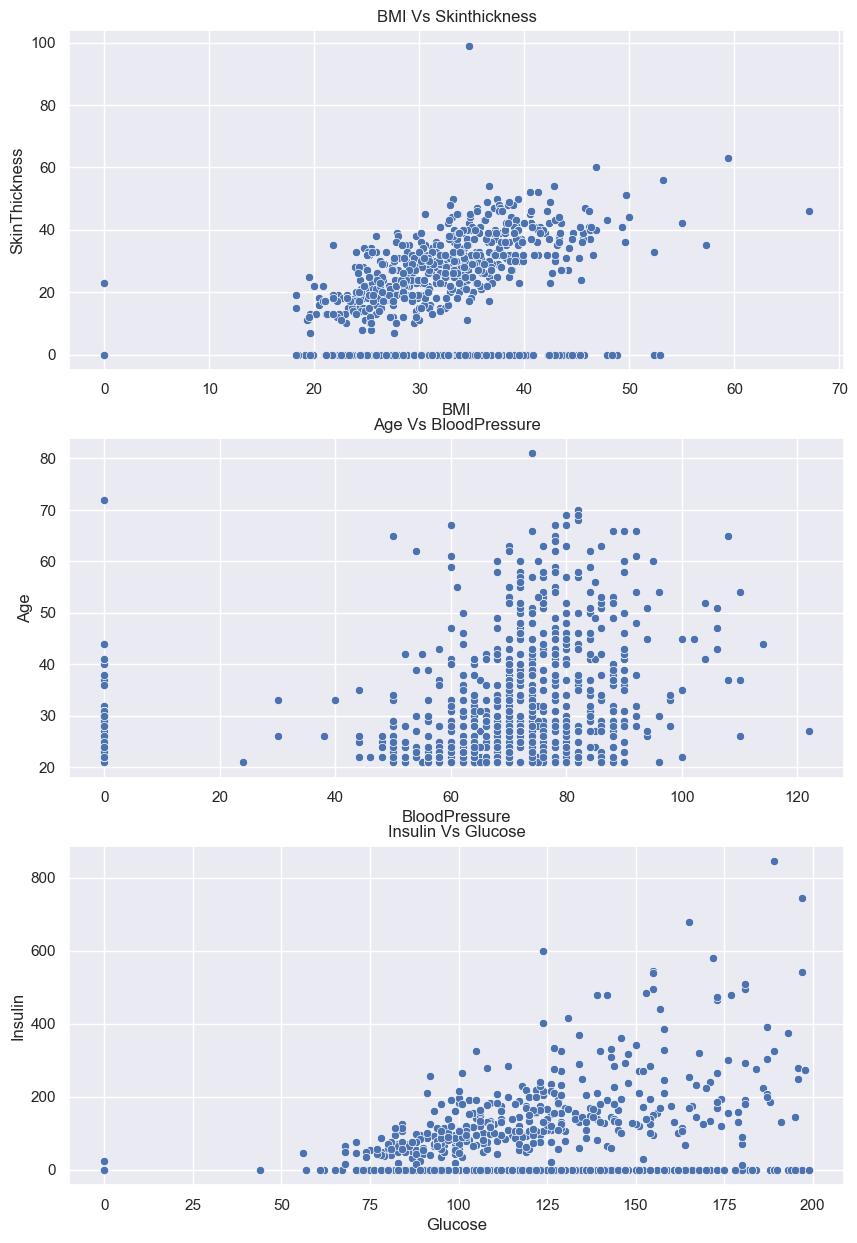

In [14]:
# Lets evaluate some more insights the data relationships
f, axes = plt.subplots(3, 1, figsize=(10, 15))
sb.scatterplot(data=diabetes_data,x="BMI",y="SkinThickness",ax = axes[0])
axes[0].set_title('BMI Vs Skinthickness')
sb.scatterplot(data=diabetes_data,x="BloodPressure",y="Age",ax = axes[1])
axes[1].set_title('Age Vs BloodPressure')
sb.scatterplot(data=diabetes_data,x="Glucose",y="Insulin",ax = axes[2])
axes[2].set_title('Insulin Vs Glucose')

- There is a strong relationship between between two independent variable 'BMI' & 'Skinthickness'. But compare to Skinthickness, BMI has strong relationship with variable 'Outcome'.
- Hence its safe to assume we can drop 'Skinthickness'.

# Cleaning the Data

<div class="alert alert-block alert-info">
We will proceed with cleaning the data by removing the outliers from 'Insulin','BMI' and 'DiabetesPedigreeFunction'
</div>

In [56]:
#Function to determine how many outliers in each of these variables
def Total_Outlier(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lowoutlier=Q1-1.5*IQR
    highoutlier=Q3+1.5*IQR
    totaloutlier=((data[column]<lowoutlier)|(data[column]>highoutlier)).sum()
    print("Total number of Outliers in "+ column + " are : {}".format(totaloutlier))
    
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']

for i in outliers_list:
    Total_Outlier(diabetes_data,i)

Total number of Outliers in Insulin are : 34
Total number of Outliers in BMI are : 19
Total number of Outliers in DiabetesPedigreeFunction are : 29


In [57]:
#After removal of Outliers
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']
def Outlier_Removal(data,column):
    clean_data = data[(data[column]<highoutlier)&(data[column]>lowoutlier)]
    totaloutlier = ((clean_data[column] < lowoutlier) | (clean_data[column] > highoutlier)).sum()
    print("Total number of Outliers in "+ column + " are : {}".format(totaloutlier))
    return clean_data

for i in outliers_list:
    lowoutlier = diabetes_data[i].quantile(0.25) - 1.5 * (diabetes_data[i].quantile(0.75) - diabetes_data[i].quantile(0.25))
    highoutlier = diabetes_data[i].quantile(0.75) + 1.5 * (diabetes_data[i].quantile(0.75) - diabetes_data[i].quantile(0.25))
    clean_data = Outlier_Removal(diabetes_data,i)

Total number of Outliers in Insulin are : 0
Total number of Outliers in BMI are : 0
Total number of Outliers in DiabetesPedigreeFunction are : 0


In [58]:
clean_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[739 rows x 9 columns]

#### Histoplot for cleaned data

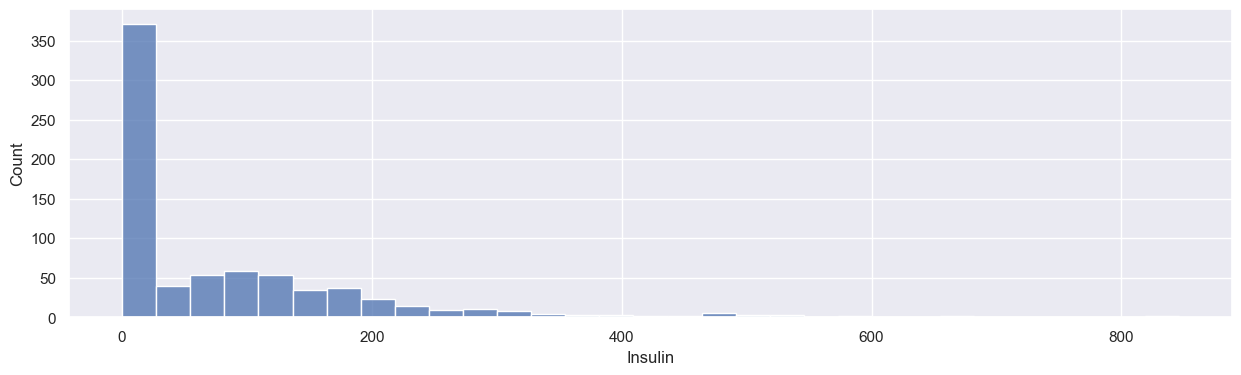

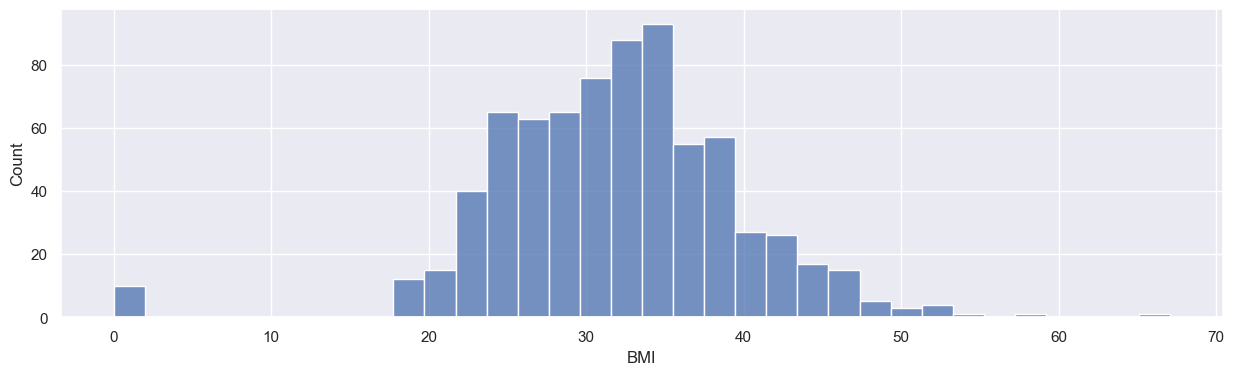

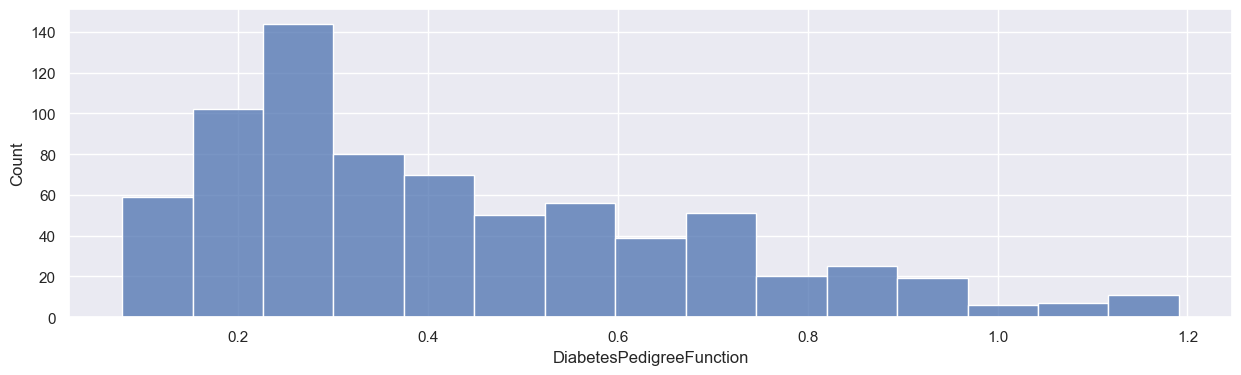

In [18]:
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']
def Univariate_boxplot (data,column):
    plt.figure(figsize=(15, 4))
    sb.histplot(data = data,x = column)

for columns in outliers_list :
    Univariate_boxplot (clean_data,columns)
    plt.show()

# Machine Learning

#### Next we would like use these few models in helping us in predicting whether  a patient has diabetes or not:
- Decision Tree
- Logistic Regressiob
- Naive Bayes Classification
- K-Means

## Binary Classification

<div class="alert alert-block alert-info">
We will be using all variables to help predict whether a patient had diabetes
Here, we would like to show how relevant each variable is to 'Outcome' using the stripplot.
</div>

### Exploration between Response and Predictor

Text(0.5, 1.0, 'Outcome by Glucose')

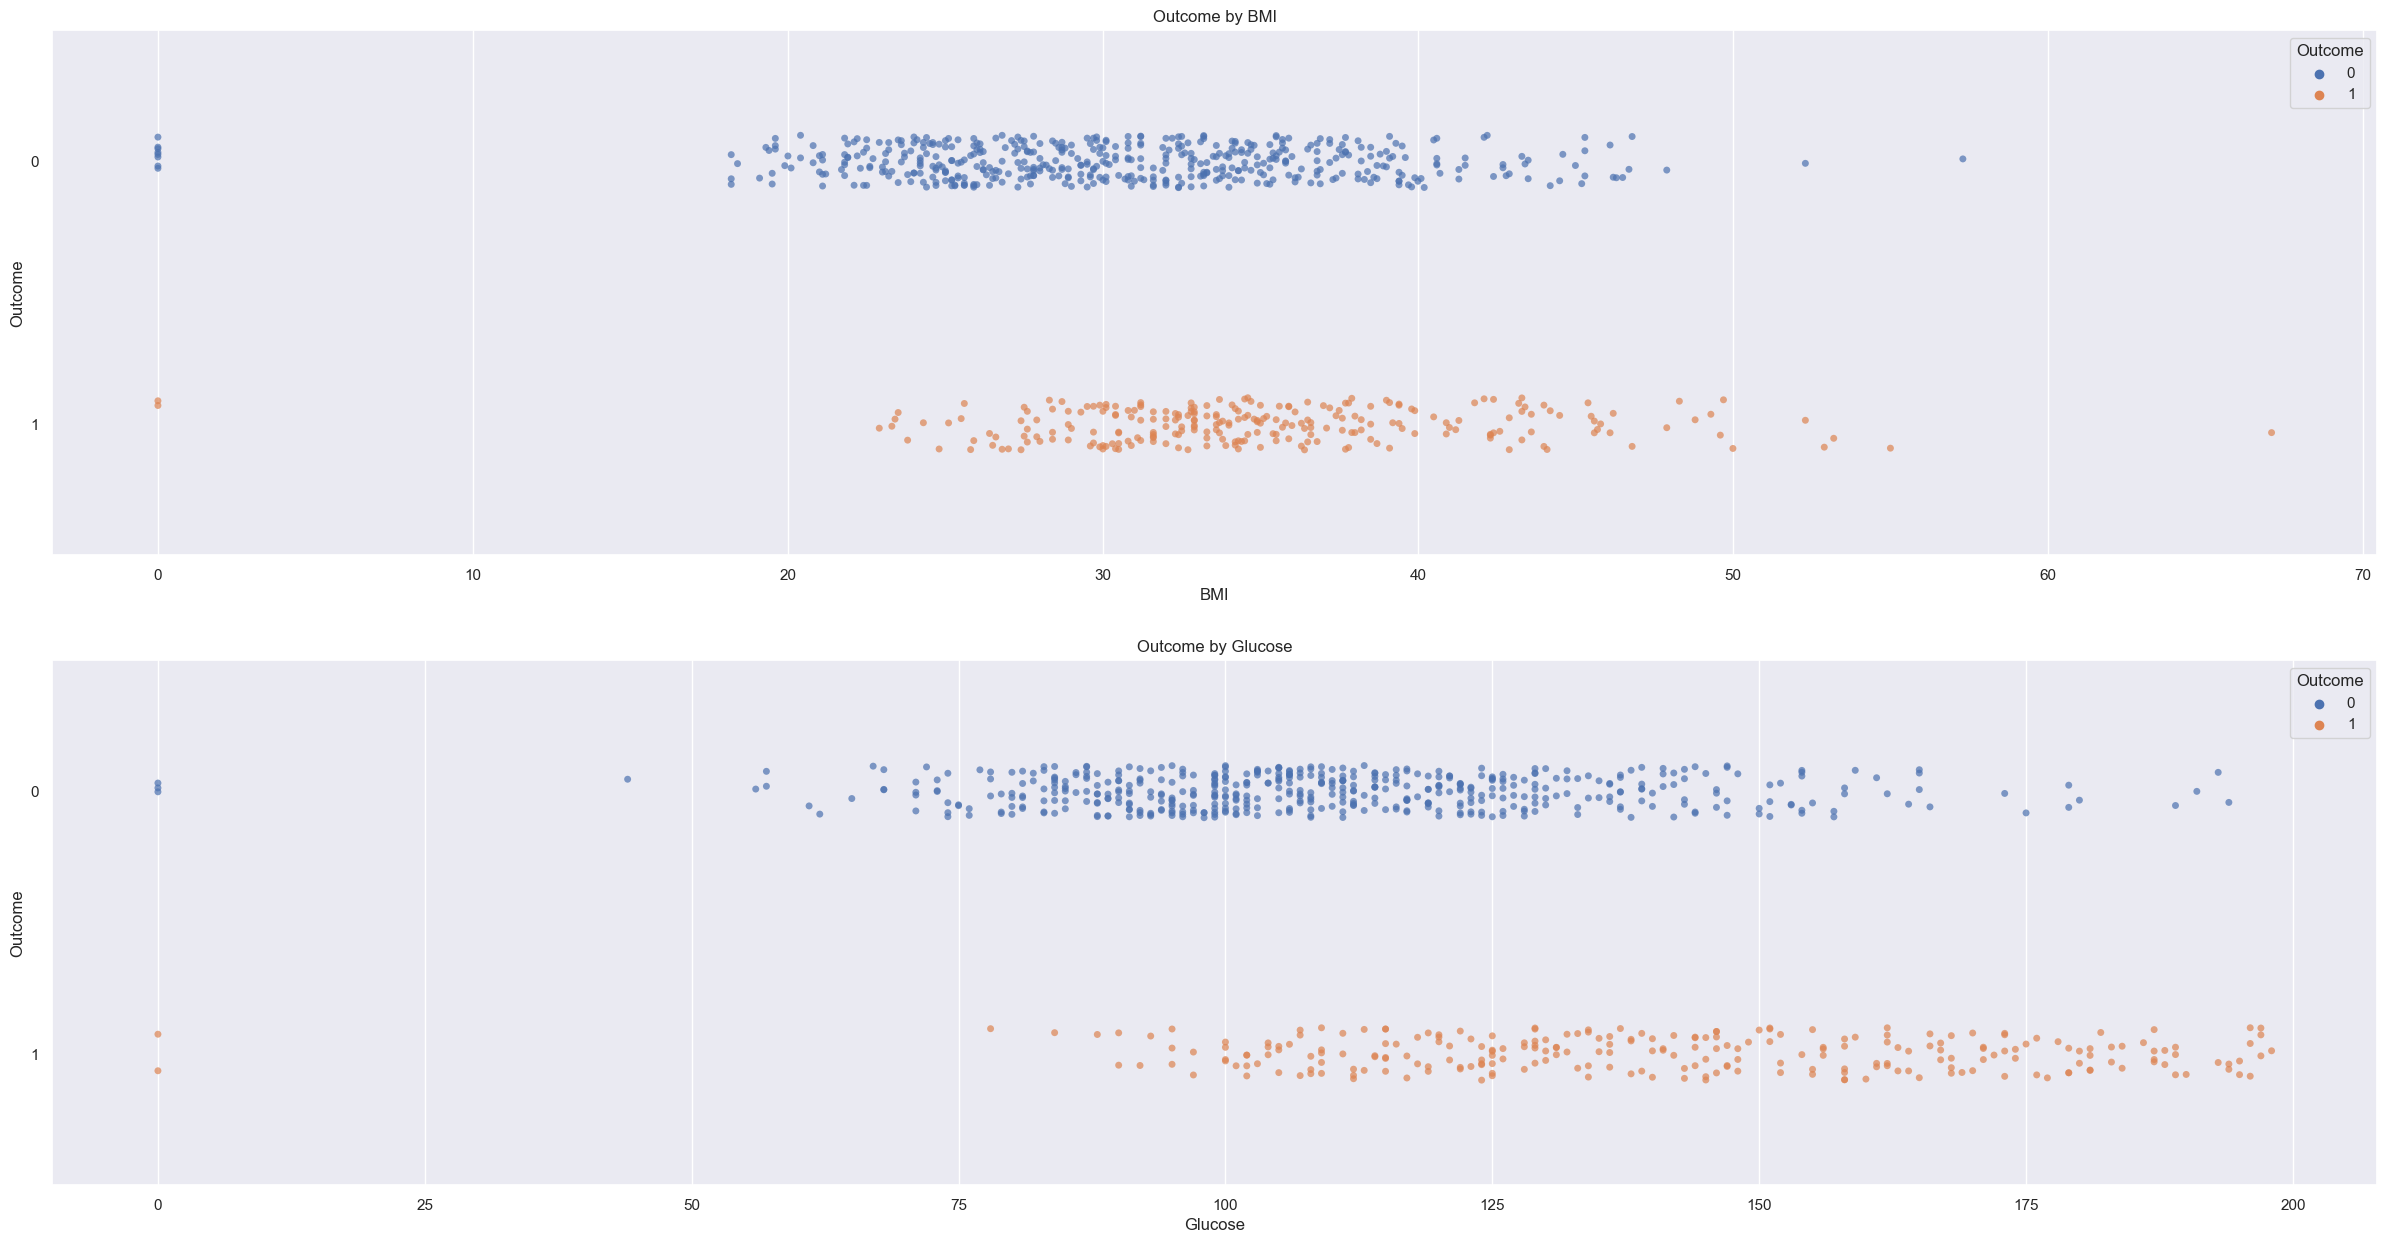

In [20]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='BMI', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by BMI')

sb.stripplot(x='Glucose', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by Glucose')

Text(0.5, 1.0, 'Outcome by Insulin')

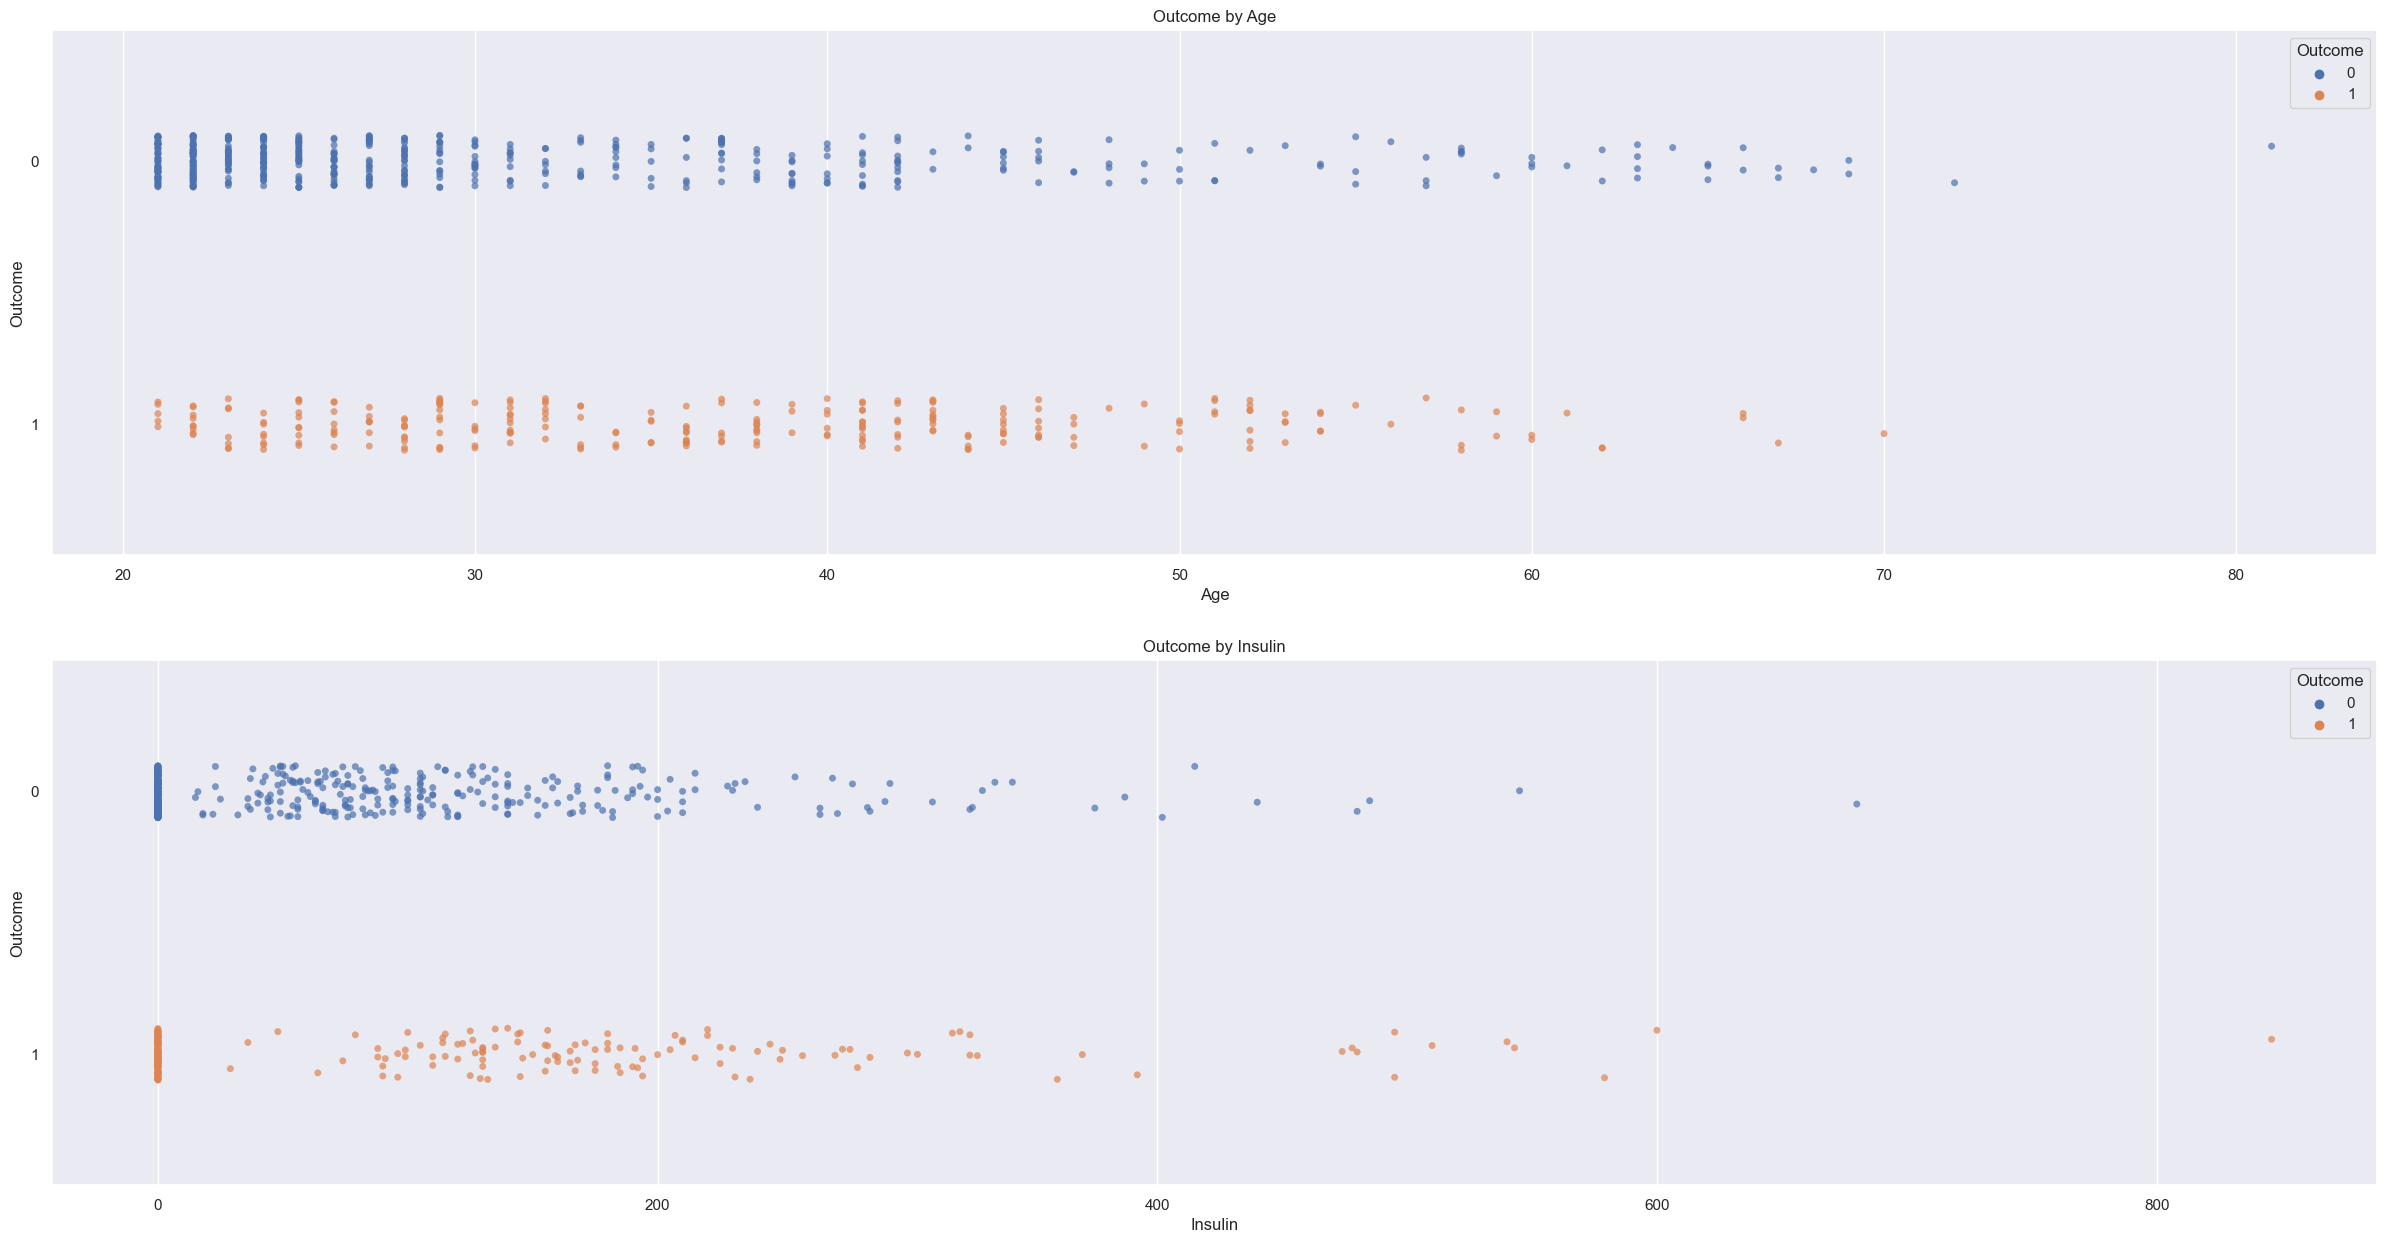

In [21]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='Age', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by Age')

sb.stripplot(x='Insulin', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by Insulin')


Text(0.5, 1.0, 'Outcome by BloodPressure')

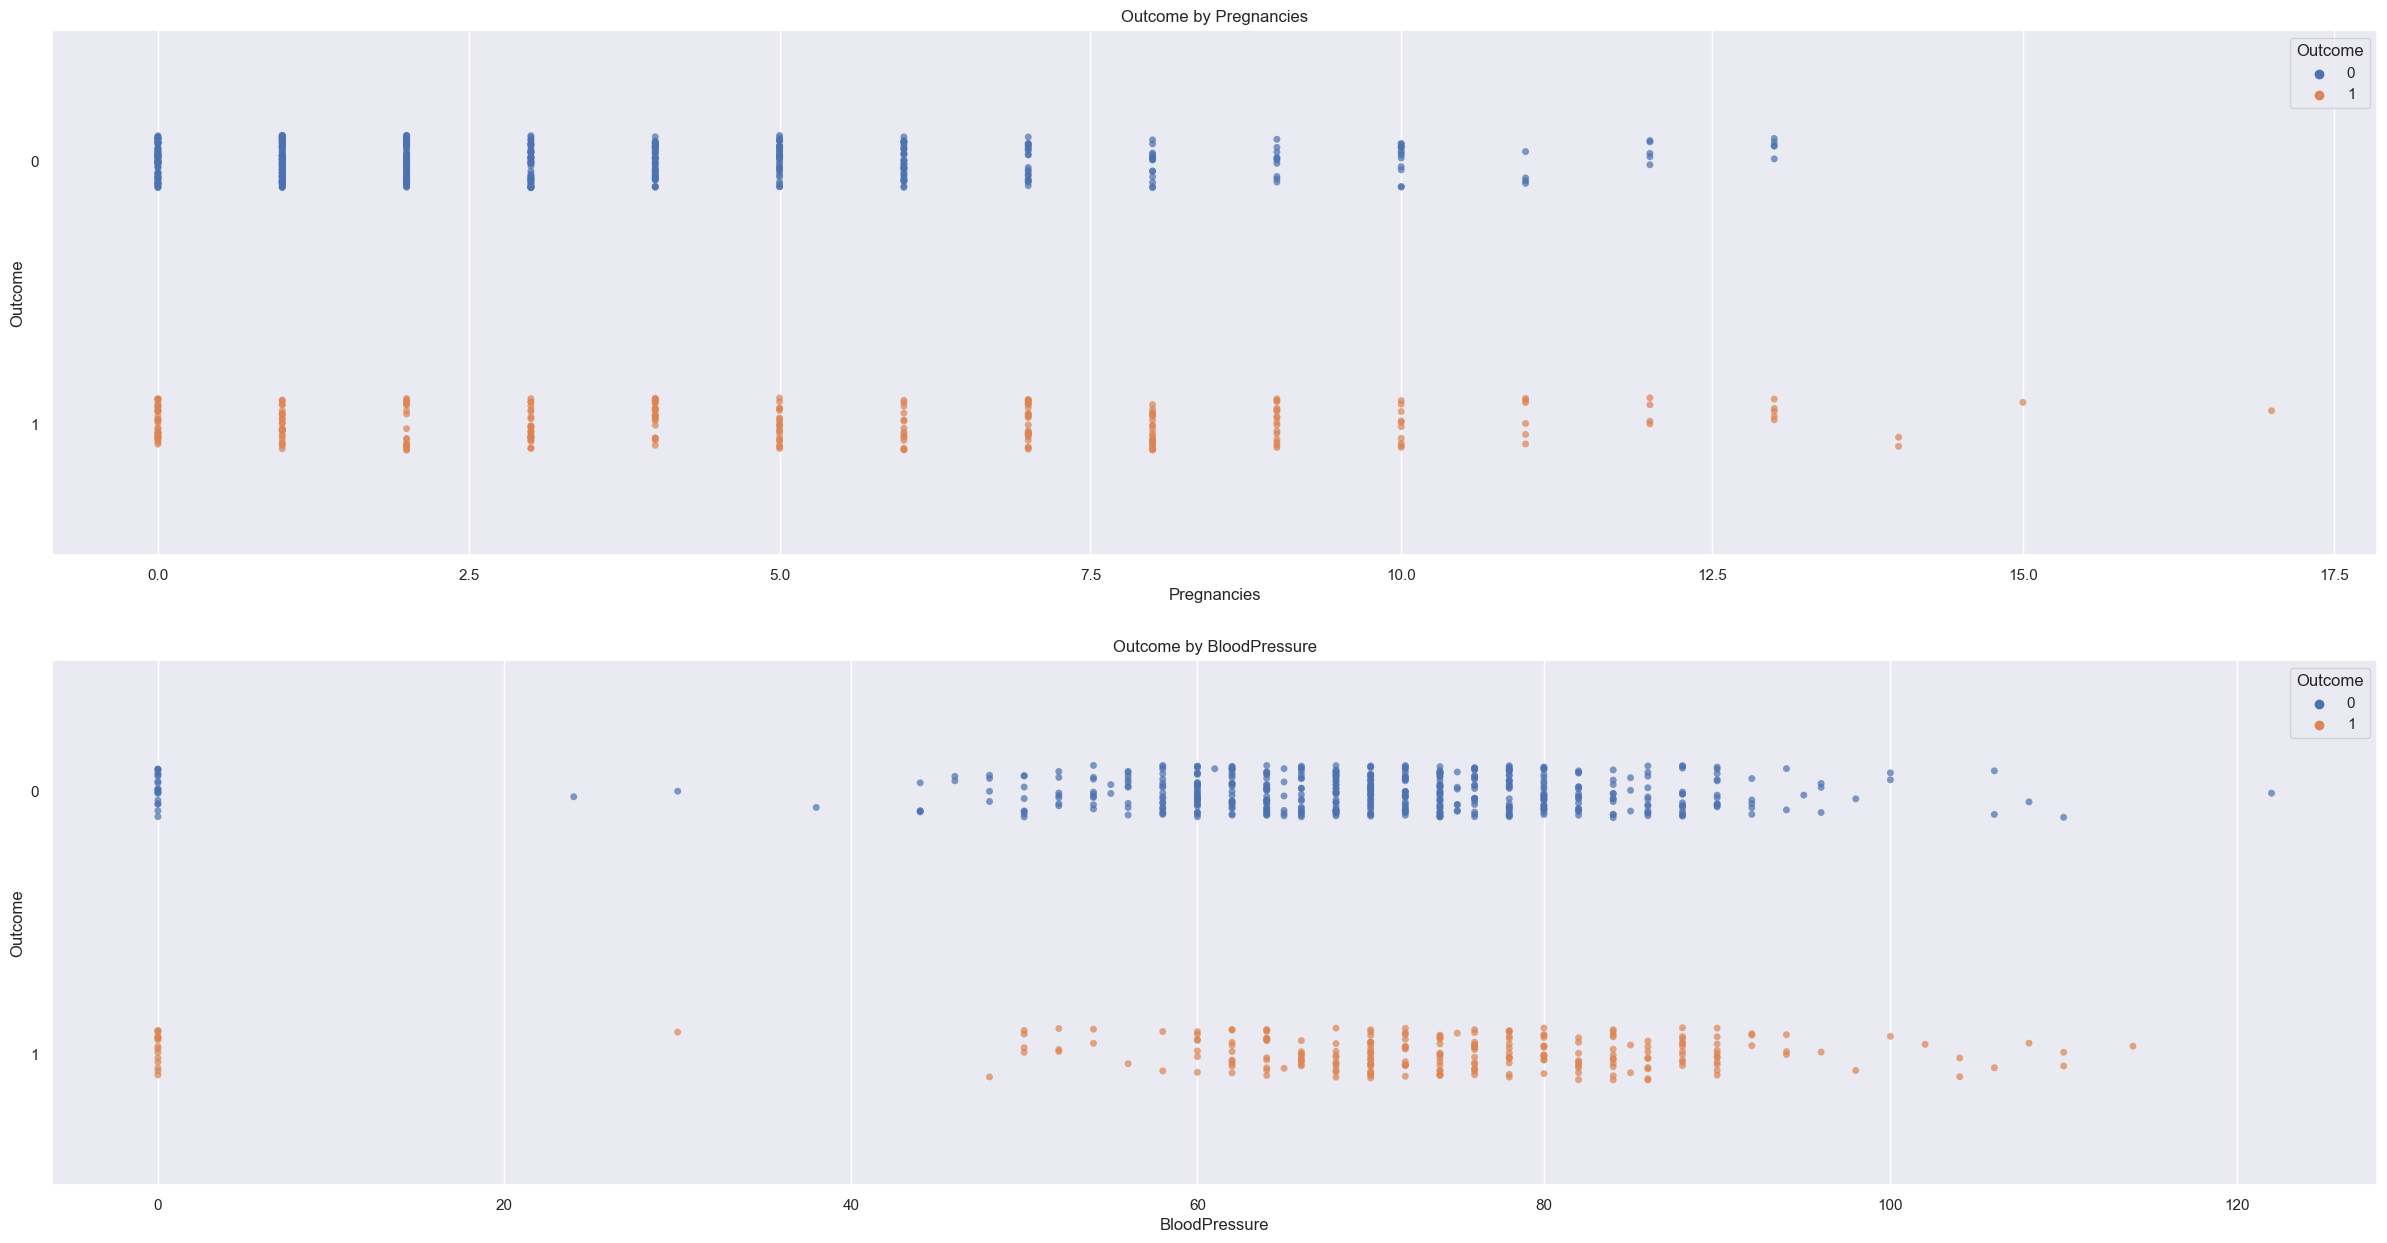

In [22]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='Pregnancies', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by Pregnancies')

sb.stripplot(x='BloodPressure', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by BloodPressure')

Text(0.5, 1.0, 'Outcome by DiabetesPedigreeFunction')

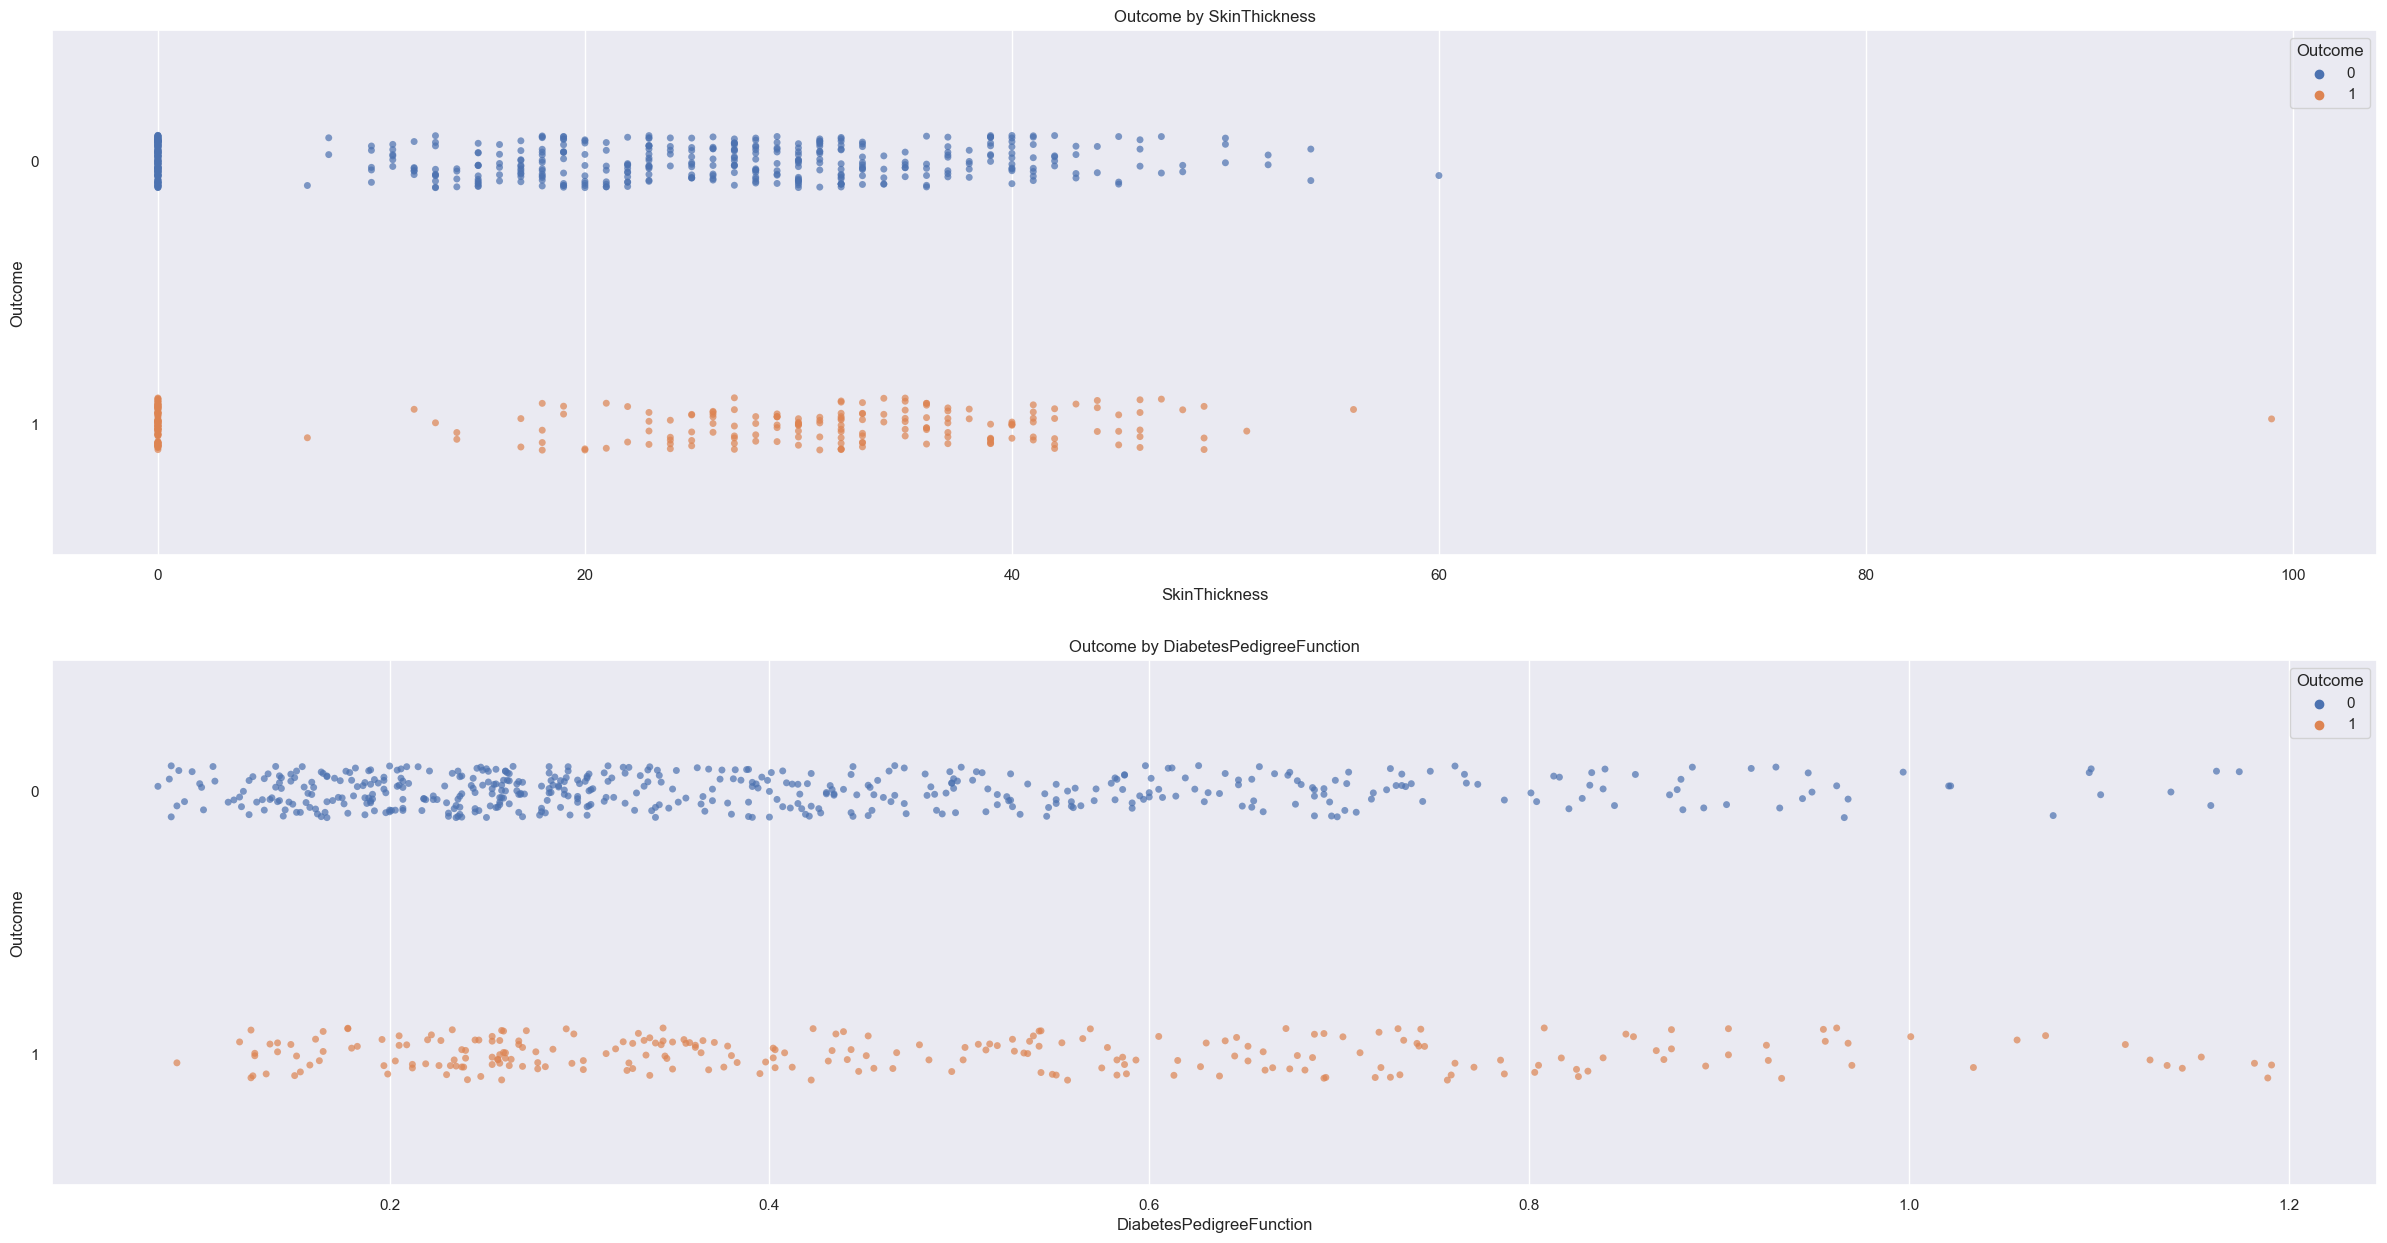

In [23]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='SkinThickness', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by SkinThickness')

sb.stripplot(x='DiabetesPedigreeFunction', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by DiabetesPedigreeFunction')

### It can be seen through the strip plots that :
***
- BMI, Glucose, Insulin and BloodPressure may have a slightly more obvious relation between them and Outcome compared to the other variables.

## Decision Tree

<div class="alert alert-block alert-info">
Since variable Glucose has the highest correlation coefficient to Outcome from previously, lets try using this variable to predict
</div>


In [79]:
#Extracting Data
result = pd.DataFrame(clean_data['Outcome'])  # Response
glucose = pd.DataFrame(clean_data['Glucose']) # Predictor

# Split the Dataset into Train and Test (randomly)
X_train, X_test, y_train, y_test = train_test_split(glucose, result, test_size = 0.35)

# Sample sizes
print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 1) (480, 1)
Test set : (259, 1) (259, 1)


In [80]:
#Making the decision tree
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.42, 0.9, 'Glucose <= 127.5\ngini = 0.455\nsamples = 480\nvalue = [312, 168]\nclass = N'),
 Text(0.16, 0.7, 'Glucose <= 94.5\ngini = 0.304\nsamples = 305\nvalue = [248, 57]\nclass = N'),
 Text(0.08, 0.5, 'Glucose <= 22.0\ngini = 0.098\nsamples = 97\nvalue = [92, 5]\nclass = N'),
 Text(0.04, 0.3, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = N'),
 Text(0.12, 0.3, 'Glucose <= 89.5\ngini = 0.081\nsamples = 94\nvalue = [90, 4]\nclass = N'),
 Text(0.08, 0.1, 'gini = 0.031\nsamples = 63\nvalue = [62, 1]\nclass = N'),
 Text(0.16, 0.1, 'gini = 0.175\nsamples = 31\nvalue = [28, 3]\nclass = N'),
 Text(0.24, 0.5, 'Glucose <= 95.5\ngini = 0.375\nsamples = 208\nvalue = [156, 52]\nclass = N'),
 Text(0.2, 0.3, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Y'),
 Text(0.28, 0.3, 'Glucose <= 99.5\ngini = 0.365\nsamples = 204\nvalue = [155, 49]\nclass = N'),
 Text(0.24, 0.1, 'gini = 0.153\nsamples = 24\nvalue = [22, 2]\nclass = N'),
 Text(0.32, 0.1, 'gini = 0.386\nsamples = 180\nvalue 

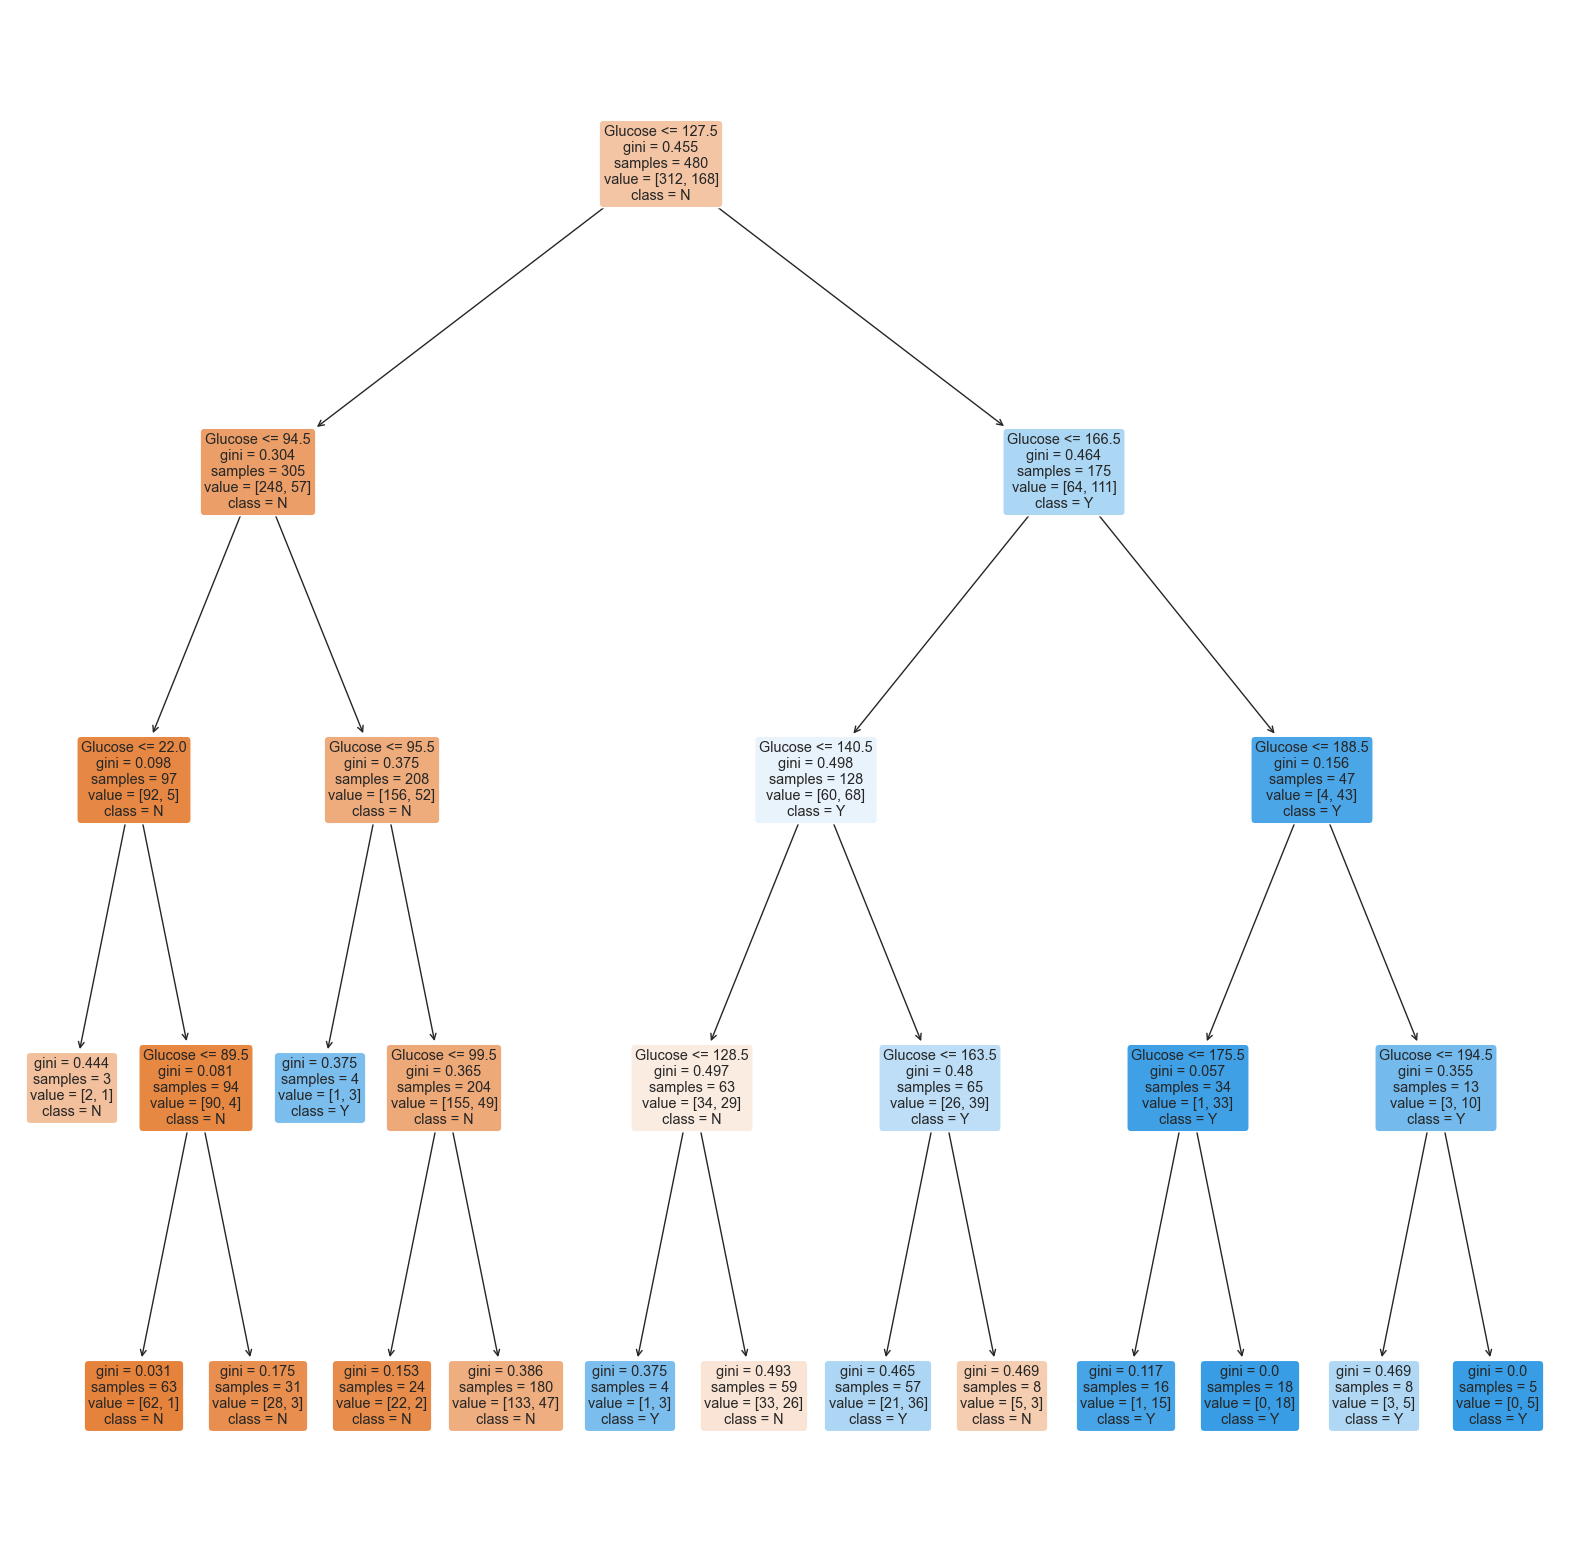

In [81]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Glucose"], 
          class_names=["N","Y"])

### Goodness of Fit test ( For first Decision Tree Model)
***

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7708333333333334

True Negative: 285.0
False Positive: 27.0
False Negative: 83.0
True Positive: 85.0

True Positive Rate :  0.5060
False Positive Rate :  0.0865

True Negative Rate :  0.9135
False Negative Rate :  0.4940

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6795366795366795

True Negative: 136.0
False Positive: 40.0
False Negative: 43.0
True Positive: 40.0

True Positive Rate :  0.4819
False Positive Rate :  0.2273

True Negative Rate :  0.7727
False Negative Rate :  0.5181


Text(0.5, 11.249999999999995, 'Predicted')

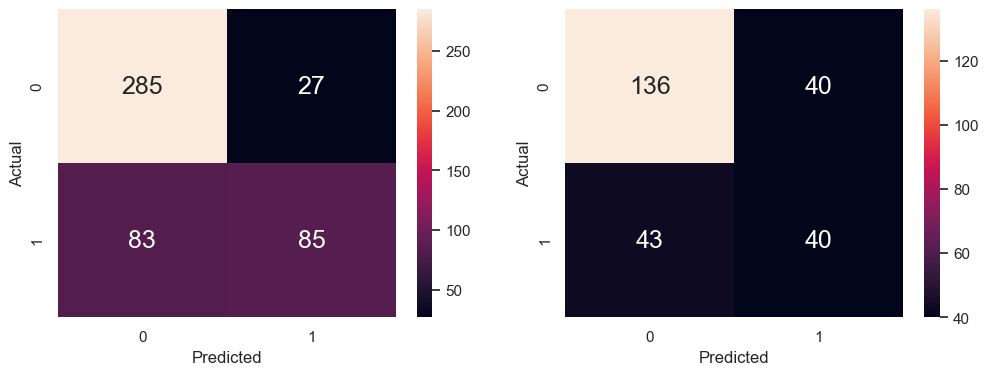

In [82]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

### Analysis
***
<div class="alert alert-block alert-warning">
By using only a single variable it can be seen that the rate for False Negatives is quite high, hence rendering the prediction model very inaccurate. Lets see what happens if we were to use all other variables instead of just a single one.
</div>


## Second Decision Tree (with all other variables)

In [147]:
#Extracting Data
y=clean_data['Outcome'] # Response
x=clean_data.drop('Outcome',axis=1) # Predictor

# Split the Dataset into Train and Test (randomly)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

# Sample sizes
print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 8) (480,)
Test set : (259, 8) (259,)


In [148]:
#Making the decision tree
dectree1 = DecisionTreeClassifier(max_depth = 4)
dectree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.45535714285714285, 0.9, 'Glucose <= 128.5\ngini = 0.45\nsamples = 480\nvalue = [316, 164]\nclass = N'),
 Text(0.19642857142857142, 0.7, 'Age <= 29.5\ngini = 0.305\nsamples = 314\nvalue = [255, 59]\nclass = N'),
 Text(0.10714285714285714, 0.5, 'BMI <= 45.4\ngini = 0.169\nsamples = 182\nvalue = [165, 17]\nclass = N'),
 Text(0.07142857142857142, 0.3, 'Pregnancies <= 7.0\ngini = 0.144\nsamples = 179\nvalue = [165, 14]\nclass = N'),
 Text(0.03571428571428571, 0.1, 'gini = 0.127\nsamples = 176\nvalue = [164, 12]\nclass = N'),
 Text(0.10714285714285714, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Y'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Y'),
 Text(0.2857142857142857, 0.5, 'BMI <= 27.35\ngini = 0.434\nsamples = 132\nvalue = [90, 42]\nclass = N'),
 Text(0.21428571428571427, 0.3, 'BMI <= 9.65\ngini = 0.067\nsamples = 29\nvalue = [28, 1]\nclass = N'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass 

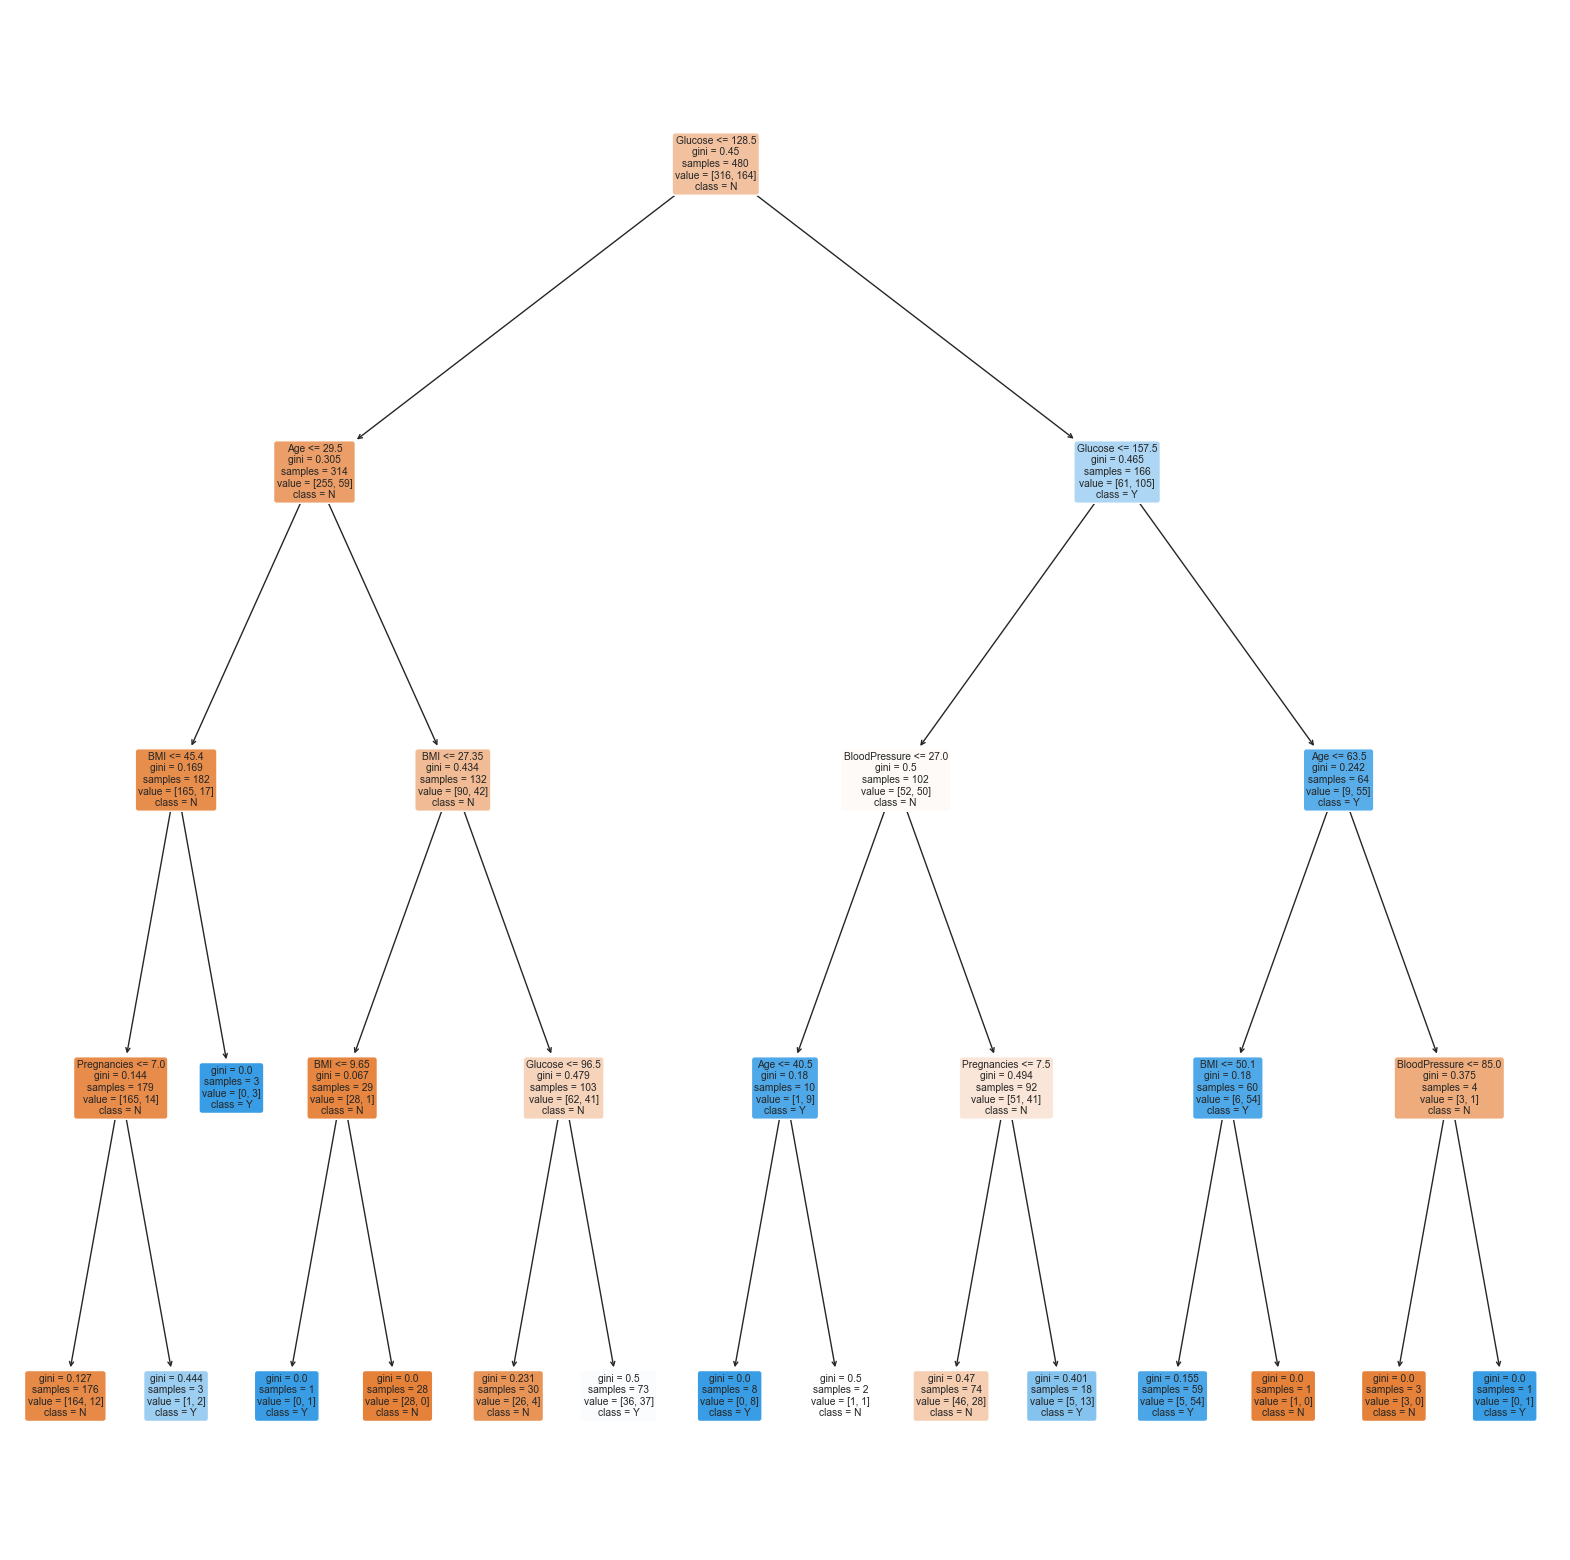

In [149]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["N","Y"])

### Goodness of Fit test ( For improved Decision Tree Model)
***

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8083333333333333

True Negative: 269.0
False Positive: 47.0
False Negative: 45.0
True Positive: 119.0

True Positive Rate :  0.7256
False Positive Rate :  0.1487

True Negative Rate :  0.8513
False Negative Rate :  0.2744

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7413127413127413

True Negative: 138.0
False Positive: 34.0
False Negative: 33.0
True Positive: 54.0

True Positive Rate :  0.6207
False Positive Rate :  0.1977

True Negative Rate :  0.8023
False Negative Rate :  0.3793


Text(0.5, 11.249999999999995, 'Predicted')

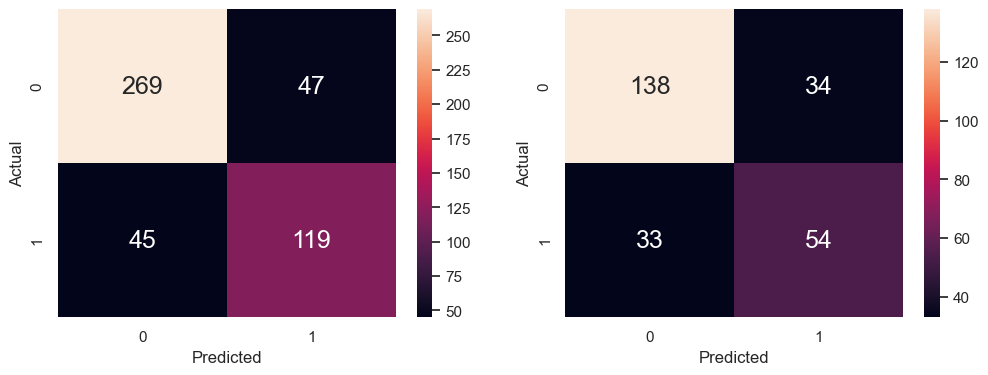

In [150]:
y_train_pred = dectree1.predict(X_train)
y_test_pred = dectree1.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

### ROC curve ( Improved Decision Tree Model )
***
<div class="alert alert-block alert-warning">
The ROC (Receiver Operating Characteristic) Curve displays the percentage of true positives predicted by the model. It plot two parameters, `TPR` and `FPR`. As the threshold decreases, the classifier labels more items as positive, which increases both the number of true positives and false positives, moving the curve upward and to the right.It can take values from 0 to 1. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5.Hence, the higher the AUC (area under the curve), the more accurately our model is able to predict outcomes.
</div>


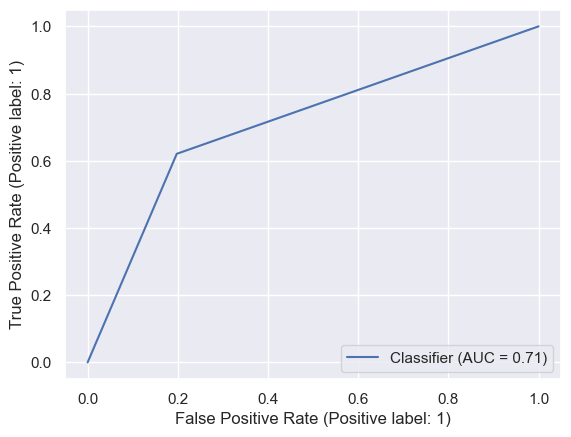

In [151]:
from sklearn.metrics import RocCurveDisplay
# ROC curve & AUC
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

- The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data.
- AUC is 0.71, that means 71% of the classifier’s predictions are correct across all classification thresholds.

#### Confusion matrix vs ROC curve
***
A confusion matrix can be used to measure the performance of a particular classifier with a fixed threshold. Given a set of input cases, the classifier scores each one, and score above the threshold are labelled Class 1 and scores below the threshold are labelled Class 2.

The ROC curve, on the other hand, examines the performance of a classifier without fixing the threshold. Given a set of input cases, the classifier scores each one. The ROC curve is then generated by testing every possible threshold and plotting each result as a point on the curve.

Understanding the performance of a classification model involves two key tools: confusion matrices and ROC curves. We can use the confusion matrix to determine how confused our model is between the positives and negatives, and we can get a bunch of summary metrics from this table to quantify the confusion. Then we ask ourselves how much confusion is okay based on our problem at hand.

Next, we use the ROC curve to plot the trade-off between sensitivity and specificity at different thresholds, and we can get an excellent overall summary metric called the AUC, which quantifies the overall performance of the model. We can then pick a threshold with a sensitivity and specificity that is ok for our case (usually based on domain expertise or familiarity with the consequences of misclassification).

Usually, we use the confusion matrix and ROC curve together when evaluating a classification model because either method has a few drawbacks that the other fills in. For example, the confusion matrix is pretty sensitive to imbalanced datasets, while the ROC curve doesn’t provide a detailed enough assessment of model performance.


### Analysis
***
<div class="alert alert-block alert-warning">
The database has a much larger proportion of negetive 'Outcome' than positive 'Outcome', hence the classifier may be biased towards the majority class (negetive) and accuracy in this context may not be meaningful. But still, we believe that variables BMI, Glucose, Insulin and BloodPressure may have contributed more compared to the other variables. Nevertheless, it is important for all of the variables to come together in order for the prediction variable 'Outcome' rather than just a single variable. 
    
Also, the accuracy difference between the Test datset and Train datset is by 10 percent, this would mean that the prediction from the decision tree may not be very consistent.
</div>



## Logistic Regression

***
<div class="alert alert-block alert-info">
<b> Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes which is true/false. It estimates the probability of a binary outcome based on one or more predictor variables. It is simple to interpret and it doesn’t require much computational resources. This makes it a good choice when the target variable is binary and the relationship between the predictors and the response is linear. </b> 
</div>


Next, we would like to introduce to multivariate Logistic Regression as it is a common classification algorithm used in data science and machine learning.

The main difference between logistic regression and decision trees is that logistic regression models the relationship between the predictor variables and the outcome variable as a linear function, while decision trees create a hierarchical tree structure to model the relationships between the variables.

In [165]:
from sklearn.linear_model import LogisticRegression
y=clean_data['Outcome']
x=clean_data.drop('Outcome',axis=1)

#New split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 8) (480,)
Test set : (259, 8) (259,)


In [166]:
#Traning the Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Text(0.5, 11.249999999999995, 'Predicted')

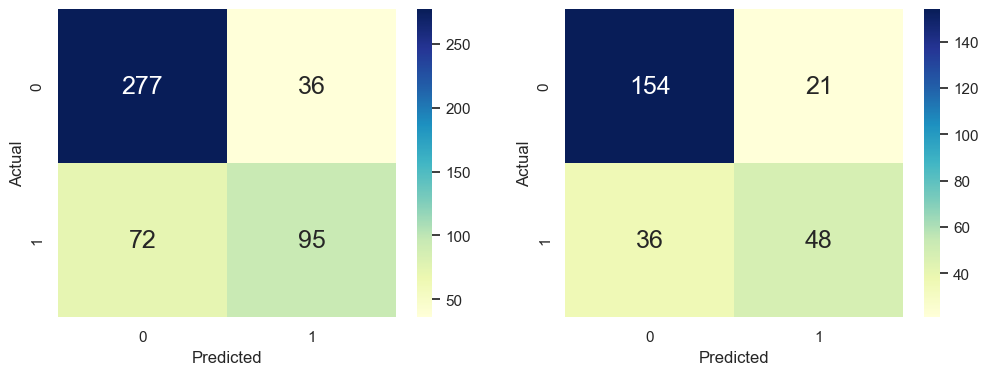

In [167]:
# Save the prediction
y_train_pred1=logistic_model.predict(X_train)
y_test_pred1=logistic_model.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="YlGnBu", ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="YlGnBu", ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

### Goodness of Fit test ( For Logistic Regression Model)
***

In [169]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logistic_model.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred1).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logistic_model.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred1).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.775

True Negative: 277.0
False Positive: 36.0
False Negative: 72.0
True Positive: 95.0

True Positive Rate :  0.5689
False Positive Rate :  0.1150

True Negative Rate :  0.8850
False Negative Rate :  0.4311

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7799227799227799

True Negative: 154.0
False Positive: 21.0
False Negative: 36.0
True Positive: 48.0

True Positive Rate :  0.5714
False Positive Rate :  0.1200

True Negative Rate :  0.8800
False Negative Rate :  0.4286


### ROC curve ( Logistic Regression Model )
***

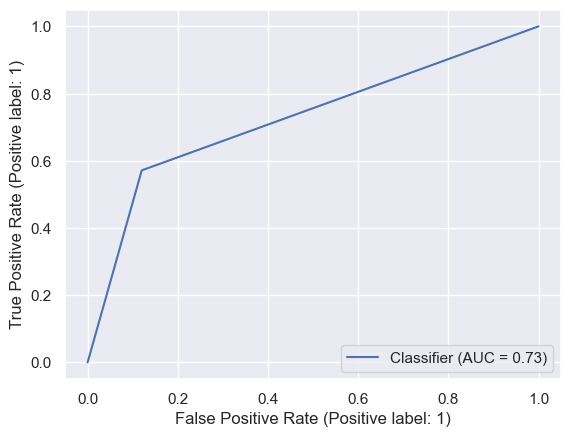

In [170]:
# ROC curve & AUC
RocCurveDisplay.from_predictions(y_test, y_test_pred1)
plt.show()

- AUC is 0.73, that means 73% of the classifier’s predictions are correct across all classification thresholds.

## Analysis of the 2 models : (Decision Tree Vs Logistic Regression)
***
<div class="alert alert-block alert-warning">
 <ul>   
<li> AUC of Logistic Regression model is higher than that of the Decision Tree model.
<li> Using the confusion matrix, the accuracy for the Decision Tree model from the train dataset is higher compared to the Logistic Regression model BUT the accuracy for the Decision Tree model from the test dataset is lower compared to the Logistic Regression model.
<li> From the confusion matrix model.The difference between accuracy from the train dataset and test dataset is smaller in the Logistic Regression model compared to the Decision Tree model.
<li> Hence, the Decision Tree may seem more accurate in the train dataset, but it is not very consistent compared to the Logistic Regression model. Therefore, Logistic Regression in this case would be more accurate and provides consistent results.    
<ul> 
</div>


# Naive Bayes Classification

<div class="alert alert-block alert-info">
<b> Naive Bayes Classification is a supervised machine learning algorithm that is used for classification tasks. It is based on applying the Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. We used it for the datset because Naive Bayes' Classification handles large amounts of data well as it is fast and efficient due to scaling well with the number of predictors and data points.</b> 
</div>


## Gaussian Naive Bayes

In [171]:
# Setting up the data
dataset = clean_data
x = dataset.drop("Outcome", axis = 1)
y = pd.DataFrame(dataset["Outcome"])
x.info()
y.info()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               739 non-null    int64  
 1   Glucose                   739 non-null    int64  
 2   BloodPressure             739 non-null    int64  
 3   SkinThickness             739 non-null    int64  
 4   Insulin                   739 non-null    int64  
 5   BMI                       739 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       739 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 52.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 767
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  739 non-null    int64
dtypes: int64(1)
memory usage: 11.5 KB


In [172]:
Gmodel = GaussianNB()
Gmodel.fit(x_train, y_train)

C:\Users\qiany\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Goodness of Fit test ( For Gaussian Naive Bayes )
***

In [173]:
y_pred = Gmodel.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
   

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       162
           1       0.75      0.66      0.70        97

    accuracy                           0.79       259
   macro avg       0.78      0.77      0.77       259
weighted avg       0.79      0.79      0.79       259

Confusion Matrix:
[[141  21]
 [ 33  64]]


<Axes: >

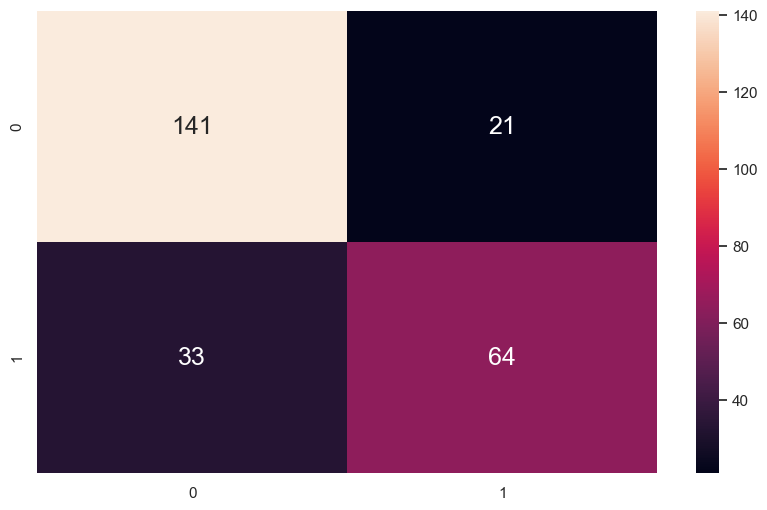

In [174]:
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

f = plt.figure(figsize=(10,6))
sb.heatmap(conf_matrix,annot = True, fmt=".0f", annot_kws={"size": 18})

### ROC curve ( Gaussian Naive Bayes Model )
***

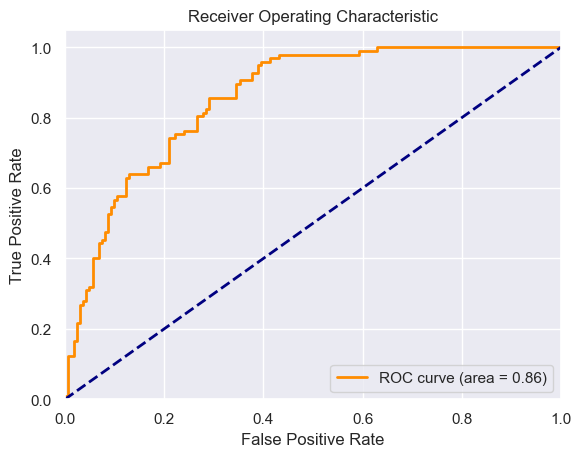

In [175]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- The ROC curve is 0.86 meaning that 86% the classifier’s predictions are correct across all classification thresholds.

### Analysis : 
***
<div class="alert alert-block alert-warning">
The ROC of the Gaussian Naive Bayes Model is higher compared to the Logistic Regression and Decision Trees model. Yet, its accuracy is almost that of the Logistic Regression model. This means that it may be slightly more effective than the Logistic Regrssion model. We have seen before that the database has a much larger proportion of negetive 'Outcome' than positive 'Outcome', the classifier may be biased towards the majority class (negetive) and thus the accuracy metric in this context may not be meaningful.
</div>

## Prediction for diabetes
***

Lets select some random rows to test out the prediction by comparing the predicted outcome with the actual outcome

In [129]:
sample_data = clean_data.sample(n=30)
X_pred = sample_data.drop('Outcome',axis =1)
X_pred

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
125            1       88             30             42       99  55.0   
558           11      103             68             40        0  46.2   
314            7      109             80             31        0  35.9   
598            1      173             74              0        0  36.8   
381            0      105             68             22        0  20.0   
157            1      109             56             21      135  25.2   
22             7      196             90              0        0  39.8   
148            5      147             78              0        0  33.7   
542           10       90             85             32        0  34.9   
611            3      174             58             22      194  32.9   
435            0      141              0              0        0  42.4   
465            0      124             56             13      105  21.8   
508            2       84             50             23       76  30.4   
24            11      143             94             33      146  36.6   
476            2      105             80             45      191  33.7   
614           11      138             74             26      144  36.1   
507            1      130             60             23      170  28.6   
329            6      105             70             32       68  30.8   
432            1       80             74             11       60  30.0   
195            5      158             84             41      210  39.4   
189            5      139             80             35      160  31.6   
609            1      111             62             13      182  24.0   
67             2      109             92              0        0  42.7   
426            0       94              0              0        0   0.0   
447            0       95             80             45       92  36.5   
112            1       89             76             34       37  31.2   
495            6      166             74              0        0  26.6   
35             4      103             60             33      192  24.0   
441            2       83             66             23       50  32.2   
678            3      121             52              0        0  36.0   

     DiabetesPedigreeFunction  Age  
125                     0.496   26  
558                     0.126   42  
314                     1.127   43  
598                     0.088   38  
381                     0.236   22  
157                     0.833   23  
22                      0.451   41  
148                     0.218   65  
542                     0.825   56  
611                     0.593   36  
435                     0.205   29  
465                     0.452   21  
508                     0.968   21  
24                      0.254   51  
476                     0.711   29  
614                     0.557   50  
507                     0.692   21  
329                     0.122   37  
432                     0.527   22  
195                     0.395   29  
189                     0.361   25  
609                     0.138   23  
67                      0.845   54  
426                     0.256   25  
447                     0.330   26  
112                     0.192   23  
495                     0.304   66  
35                      0.966   33  
441                     0.497   22  
678                     0.127   25

#### Prediction using Decision Tree

In [130]:
# Predict Response corresponding to Predictors
y_pred1 = dectree1.predict(X_pred)
y_pred1

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [131]:
# Predict Probabilities corresponding to Predictors
y_prob1 = dectree1.predict_proba(X_pred)
y_prob1

array([[0.82828283, 0.17171717],
       [0.69230769, 0.30769231],
       [0.39393939, 0.60606061],
       [0.06818182, 0.93181818],
       [0.99038462, 0.00961538],
       [0.99038462, 0.00961538],
       [0.06818182, 0.93181818],
       [0.92307692, 0.07692308],
       [0.39393939, 0.60606061],
       [0.06818182, 0.93181818],
       [0.92307692, 0.07692308],
       [0.99038462, 0.00961538],
       [0.99038462, 0.00961538],
       [0.        , 1.        ],
       [0.82828283, 0.17171717],
       [0.        , 1.        ],
       [0.99038462, 0.00961538],
       [0.69230769, 0.30769231],
       [0.99038462, 0.00961538],
       [0.50980392, 0.49019608],
       [0.50980392, 0.49019608],
       [0.99038462, 0.00961538],
       [0.39393939, 0.60606061],
       [0.99038462, 0.00961538],
       [0.82828283, 0.17171717],
       [0.82828283, 0.17171717],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.82828283, 0.17171717],
       [0.82828283, 0.17171717]])

In [139]:
# Summarize the Actuals and Predictions
y_pred1 = pd.DataFrame(y_pred1, columns = ["PredOutcome"], index = sample_data.index)
diabetes_acc1 = pd.concat([sample_data, y_pred1], axis = 1)

diabetes_acc1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
125            1       88             30             42       99  55.0   
558           11      103             68             40        0  46.2   
314            7      109             80             31        0  35.9   
598            1      173             74              0        0  36.8   
381            0      105             68             22        0  20.0   
157            1      109             56             21      135  25.2   
22             7      196             90              0        0  39.8   
148            5      147             78              0        0  33.7   
542           10       90             85             32        0  34.9   
611            3      174             58             22      194  32.9   
435            0      141              0              0        0  42.4   
465            0      124             56             13      105  21.8   
508            2       84             50             23       76  30.4   
24            11      143             94             33      146  36.6   
476            2      105             80             45      191  33.7   
614           11      138             74             26      144  36.1   
507            1      130             60             23      170  28.6   
329            6      105             70             32       68  30.8   
432            1       80             74             11       60  30.0   
195            5      158             84             41      210  39.4   
189            5      139             80             35      160  31.6   
609            1      111             62             13      182  24.0   
67             2      109             92              0        0  42.7   
426            0       94              0              0        0   0.0   
447            0       95             80             45       92  36.5   
112            1       89             76             34       37  31.2   
495            6      166             74              0        0  26.6   
35             4      103             60             33      192  24.0   
441            2       83             66             23       50  32.2   
678            3      121             52              0        0  36.0   

     DiabetesPedigreeFunction  Age  Outcome  PredOutcome  
125                     0.496   26        1            0  
558                     0.126   42        0            0  
314                     1.127   43        1            1  
598                     0.088   38        1            1  
381                     0.236   22        0            0  
157                     0.833   23        0            0  
22                      0.451   41        1            1  
148                     0.218   65        0            0  
542                     0.825   56        1            1  
611                     0.593   36        1            1  
435                     0.205   29        1            0  
465                     0.452   21        0            0  
508                     0.968   21        0            0  
24                      0.254   51        1            1  
476                     0.711   29        1            0  
614                     0.557   50        1            1  
507                     0.692   21        0            0  
329                     0.122   37        0            0  
432                     0.527   22        0            0  
195                     0.395   29        1            0  
189                     0.361   25        1            0  
609                     0.138   23        0            0  
67                      0.845   54        0            1  
426                     0.256   25        0            0  
447                     0.330   26        0            0  
112                     0.192   23        0            0  
495                     0.304   66        0            0  
35                      0.966   33        0            0  

#### Prediction using Logistic Regression

In [133]:
y_pred2 = logistic_model.predict(X_pred)
y_pred2

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [134]:
y_prob2 = logistic_model.predict_proba(X_pred)
y_prob2

array([[0.44751518, 0.55248482],
       [0.4032876 , 0.5967124 ],
       [0.48805266, 0.51194734],
       [0.25852504, 0.74147496],
       [0.97011623, 0.02988377],
       [0.88302136, 0.11697864],
       [0.04748027, 0.95251973],
       [0.30311993, 0.69688007],
       [0.63898369, 0.36101631],
       [0.21285833, 0.78714167],
       [0.16850201, 0.83149799],
       [0.90341151, 0.09658849],
       [0.88881607, 0.11118393],
       [0.34067814, 0.65932186],
       [0.8707711 , 0.1292289 ],
       [0.24381638, 0.75618362],
       [0.77116056, 0.22883944],
       [0.85313296, 0.14686704],
       [0.95886648, 0.04113352],
       [0.35915334, 0.64084666],
       [0.69855866, 0.30144134],
       [0.94700633, 0.05299367],
       [0.47482673, 0.52517327],
       [0.98727496, 0.01272504],
       [0.92794727, 0.07205273],
       [0.95995735, 0.04004265],
       [0.24155177, 0.75844823],
       [0.8720076 , 0.1279924 ],
       [0.93479002, 0.06520998],
       [0.64256949, 0.35743051]])

In [135]:
y_pred2 = pd.DataFrame(y_pred2, columns = ["PredOutcome"], index = sample_data.index)
diabetes_acc2 = pd.concat([sample_data, y_pred2], axis = 1)

diabetes_acc2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
125            1       88             30             42       99  55.0   
558           11      103             68             40        0  46.2   
314            7      109             80             31        0  35.9   
598            1      173             74              0        0  36.8   
381            0      105             68             22        0  20.0   
157            1      109             56             21      135  25.2   
22             7      196             90              0        0  39.8   
148            5      147             78              0        0  33.7   
542           10       90             85             32        0  34.9   
611            3      174             58             22      194  32.9   
435            0      141              0              0        0  42.4   
465            0      124             56             13      105  21.8   
508            2       84             50             23       76  30.4   
24            11      143             94             33      146  36.6   
476            2      105             80             45      191  33.7   
614           11      138             74             26      144  36.1   
507            1      130             60             23      170  28.6   
329            6      105             70             32       68  30.8   
432            1       80             74             11       60  30.0   
195            5      158             84             41      210  39.4   
189            5      139             80             35      160  31.6   
609            1      111             62             13      182  24.0   
67             2      109             92              0        0  42.7   
426            0       94              0              0        0   0.0   
447            0       95             80             45       92  36.5   
112            1       89             76             34       37  31.2   
495            6      166             74              0        0  26.6   
35             4      103             60             33      192  24.0   
441            2       83             66             23       50  32.2   
678            3      121             52              0        0  36.0   

     DiabetesPedigreeFunction  Age  Outcome  PredOutcome  
125                     0.496   26        1            1  
558                     0.126   42        0            1  
314                     1.127   43        1            1  
598                     0.088   38        1            1  
381                     0.236   22        0            0  
157                     0.833   23        0            0  
22                      0.451   41        1            1  
148                     0.218   65        0            1  
542                     0.825   56        1            0  
611                     0.593   36        1            1  
435                     0.205   29        1            1  
465                     0.452   21        0            0  
508                     0.968   21        0            0  
24                      0.254   51        1            1  
476                     0.711   29        1            0  
614                     0.557   50        1            1  
507                     0.692   21        0            0  
329                     0.122   37        0            0  
432                     0.527   22        0            0  
195                     0.395   29        1            1  
189                     0.361   25        1            0  
609                     0.138   23        0            0  
67                      0.845   54        0            1  
426                     0.256   25        0            0  
447                     0.330   26        0            0  
112                     0.192   23        0            0  
495                     0.304   66        0            1  
35                      0.966   33        0            0  

#### Prediction using Gaussian Naive Bayes

In [136]:
# Predict Response corresponding to Predictors
y_pred3 = Gmodel.predict(X_pred)
y_pred3

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [137]:
y_prob3 = Gmodel.predict_proba(X_pred)
y_prob3

array([[9.32824882e-01, 6.71751183e-02],
       [2.72518241e-01, 7.27481759e-01],
       [3.10440844e-01, 6.89559156e-01],
       [2.60127370e-01, 7.39872630e-01],
       [9.95319300e-01, 4.68070002e-03],
       [9.70517990e-01, 2.94820101e-02],
       [1.13600885e-02, 9.88639911e-01],
       [3.46950825e-01, 6.53049175e-01],
       [2.72959594e-01, 7.27040406e-01],
       [1.66168688e-01, 8.33831312e-01],
       [8.45435122e-01, 1.54564878e-01],
       [9.88494233e-01, 1.15057671e-02],
       [9.70467414e-01, 2.95325864e-02],
       [4.79135274e-02, 9.52086473e-01],
       [7.29470594e-01, 2.70529406e-01],
       [8.04315452e-02, 9.19568455e-01],
       [9.09450213e-01, 9.05497871e-02],
       [9.04403911e-01, 9.55960886e-02],
       [9.86105006e-01, 1.38949936e-02],
       [1.34186814e-01, 8.65813186e-01],
       [7.00679849e-01, 2.99320151e-01],
       [9.83780713e-01, 1.62192867e-02],
       [4.80172322e-01, 5.19827678e-01],
       [9.99980063e-01, 1.99365396e-05],
       [9.143520

In [176]:
y_pred3 = pd.DataFrame(y_pred3, columns = ["PredOutcome"], index = sample_data.index)
diabetes_acc3 = pd.concat([sample_data, y_pred2], axis = 1)

diabetes_acc3

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
125            1       88             30             42       99  55.0   
558           11      103             68             40        0  46.2   
314            7      109             80             31        0  35.9   
598            1      173             74              0        0  36.8   
381            0      105             68             22        0  20.0   
157            1      109             56             21      135  25.2   
22             7      196             90              0        0  39.8   
148            5      147             78              0        0  33.7   
542           10       90             85             32        0  34.9   
611            3      174             58             22      194  32.9   
435            0      141              0              0        0  42.4   
465            0      124             56             13      105  21.8   
508            2       84             50             23       76  30.4   
24            11      143             94             33      146  36.6   
476            2      105             80             45      191  33.7   
614           11      138             74             26      144  36.1   
507            1      130             60             23      170  28.6   
329            6      105             70             32       68  30.8   
432            1       80             74             11       60  30.0   
195            5      158             84             41      210  39.4   
189            5      139             80             35      160  31.6   
609            1      111             62             13      182  24.0   
67             2      109             92              0        0  42.7   
426            0       94              0              0        0   0.0   
447            0       95             80             45       92  36.5   
112            1       89             76             34       37  31.2   
495            6      166             74              0        0  26.6   
35             4      103             60             33      192  24.0   
441            2       83             66             23       50  32.2   
678            3      121             52              0        0  36.0   

     DiabetesPedigreeFunction  Age  Outcome  PredOutcome  
125                     0.496   26        1            1  
558                     0.126   42        0            1  
314                     1.127   43        1            1  
598                     0.088   38        1            1  
381                     0.236   22        0            0  
157                     0.833   23        0            0  
22                      0.451   41        1            1  
148                     0.218   65        0            1  
542                     0.825   56        1            0  
611                     0.593   36        1            1  
435                     0.205   29        1            1  
465                     0.452   21        0            0  
508                     0.968   21        0            0  
24                      0.254   51        1            1  
476                     0.711   29        1            0  
614                     0.557   50        1            1  
507                     0.692   21        0            0  
329                     0.122   37        0            0  
432                     0.527   22        0            0  
195                     0.395   29        1            1  
189                     0.361   25        1            0  
609                     0.138   23        0            0  
67                      0.845   54        0            1  
426                     0.256   25        0            0  
447                     0.330   26        0            0  
112                     0.192   23        0            0  
495                     0.304   66        0            1  
35                      0.966   33        0            0  

- Decision Tree Model has 7 'hits'
- Logistic Regression Model has 8 'hits'
- Gaussian Naive Bayes Model has 9 'hits'
***
###### Hence, the Gaussian Naive Bayes Model has a higher accuracy in prediction compared to the other two, although from this context here it does not seem too big of a difference.

## K-means


<div class="alert alert-block alert-info">
<b>Cluster analysis is a technique used in data mining and machine learning to group similar objects into clusters. K-means clustering is a widely used method for cluster analysis where the aim is to partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized.</b>
</div>

In [44]:
data = diabetes_data

## K-means clustering between age and bmi

C:\Users\qiany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\qiany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


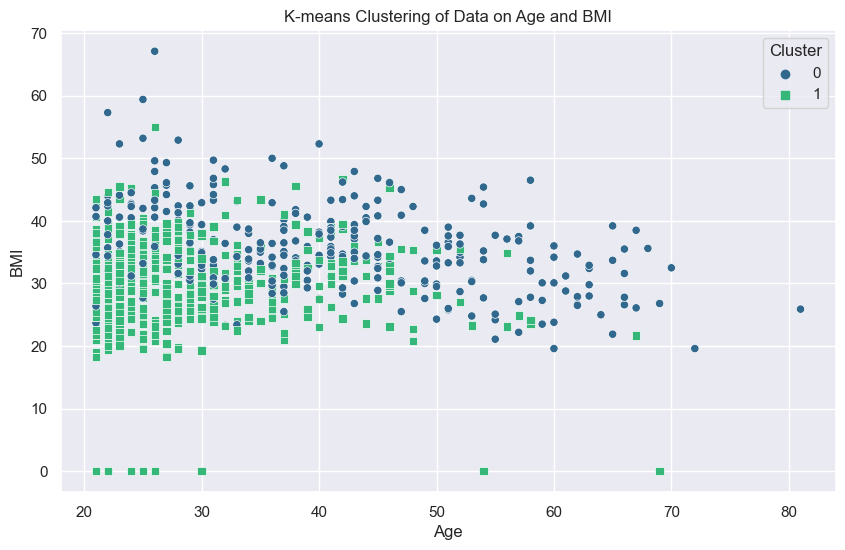

In [46]:
def load_and_preprocess_data(filepath):
    cluster_data = data[['Age', 'BMI', 'Insulin', 'Glucose']].dropna()
    
    return cluster_data

def apply_kmeans_clustering(data, n_clusters=2):
    # Normalize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Adding cluster labels to the dataframe for visualization
    data['Cluster'] = cluster_labels
    
    return data

def plot_clusters(data):
    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    sb.scatterplot(data=data, x='Age', y='BMI', hue='Cluster', palette='viridis', style=data['Cluster'], markers=['o', 's'])
    plt.title('K-means Clustering of Data on Age and BMI')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.legend(title='Cluster')
    plt.show()

def main():
    filepath = 'path_to_your_data_file.csv'  # Update with the actual file path
    data = load_and_preprocess_data(filepath)
    clustered_data = apply_kmeans_clustering(data)
    plot_clusters(clustered_data)

if __name__ == "__main__":
    main()


## Scatter plot between Age and BMI

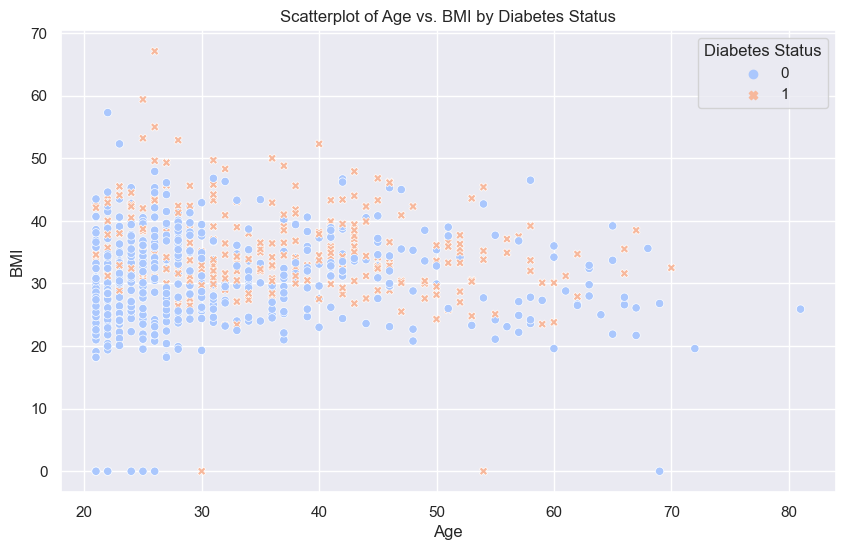

In [48]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=data, x='Age', y='BMI', hue='Outcome', palette='coolwarm', style=data['Outcome'], markers=['o', 'X'])
plt.title('Scatterplot of Age vs. BMI by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Diabetes Status')
plt.show()

The K-means clustering divides the data into 2 part, marked with different colours, although both variables may have some intersection with each other. The scatter plot of Age against BMI also uses different colours to show whether a patient has diabetes or not. If we compare the K-means clustering and scatter plot for actual diabetes, we can see that for the group with a BMI of more than 25 to 30 is more likely to have diabetes. Age on the other hand, for those that have diabetes can range from 20 to 70.

Hence, group 0 has a higher chance of having diabetes.

## K-means between Insulin and Glucose

C:\Users\qiany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\qiany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


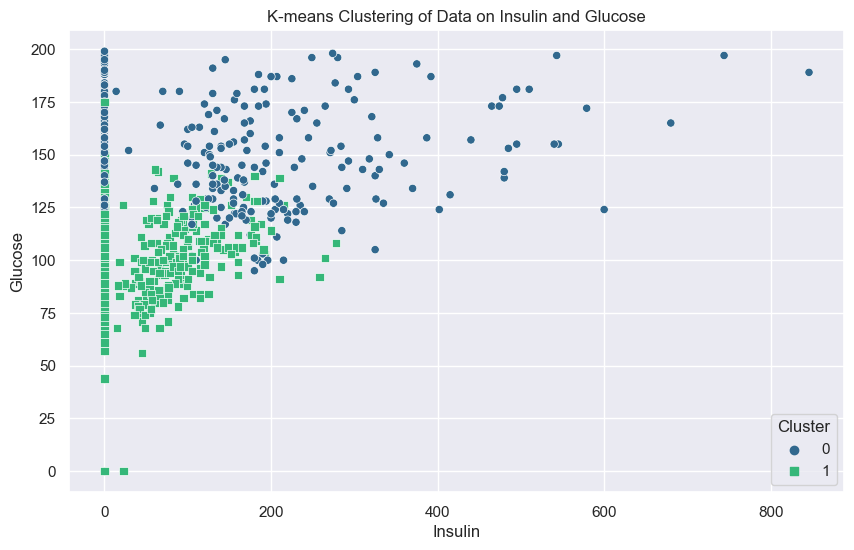

In [50]:
def load_and_preprocess_data(filepath):
    # Load the data from the provided Excel file
    #data = pd.read_csv(filepath)
    
    # Selecting the columns for clustering and dropping any rows with missing data
    cluster_data = data[['Age', 'BMI', 'Insulin', 'Glucose']].dropna()
    
    return cluster_data

def apply_kmeans_clustering(data, n_clusters=2):
    # Normalize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Adding cluster labels to the dataframe for visualization
    data['Cluster'] = cluster_labels
    
    return data

def plot_clusters(data):
    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    sb.scatterplot(data=data, x='Insulin', y='Glucose', hue='Cluster', palette='viridis', style=data['Cluster'], markers=['o', 's'])
    plt.title('K-means Clustering of Data on Insulin and Glucose')
    plt.xlabel('Insulin')
    plt.ylabel('Glucose')
    plt.legend(title='Cluster')
    plt.show()

def main():
    filepath = 'path_to_your_data_file.csv'  # Update with the actual file path
    data = load_and_preprocess_data(filepath)
    clustered_data = apply_kmeans_clustering(data)
    plot_clusters(clustered_data)

if __name__ == "__main__":
    main()


## Scatter plot between Insulin and Glucose

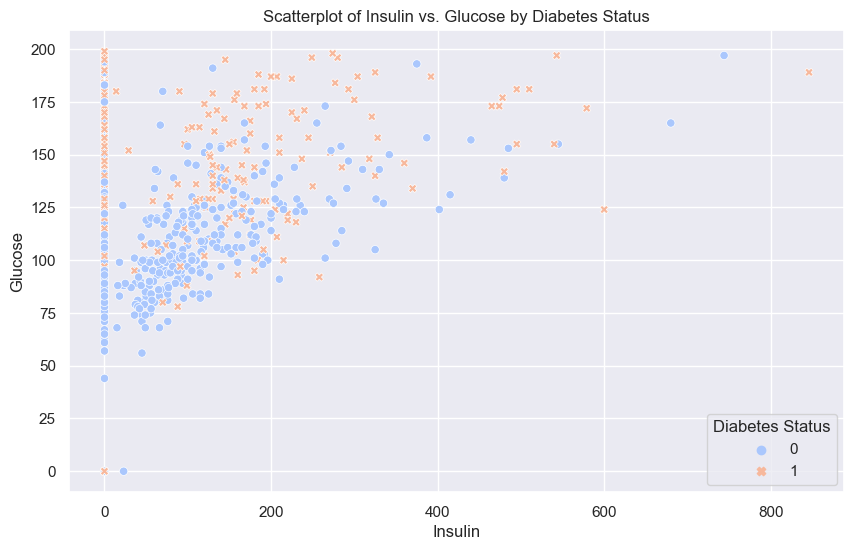

In [52]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=data, x='Insulin', y='Glucose', hue='Outcome', palette='coolwarm', style=data['Outcome'], markers=['o', 'X'])
plt.title('Scatterplot of Insulin vs. Glucose by Diabetes Status')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.legend(title='Diabetes Status')
plt.show()

K-means divided the data here like how it did before by also using different colours. The scatter plot of Insulin against Glucose also again uses different colours to show whether a patient has diabetes or not. If we compare the K-means clustering and scatter plot for actual diabetes, we can see that those with Glucose of more than 125 and Insulin of lower than 200 to 350 have a higher chance of having diabetes. Based on the K-Means clustering, group 0 is more likely to have diabetes.

### Alnalysis
***

<div class="alert alert-block alert-warning">
'k=2' is used to represent whether a patient has diabetes or not. By dividing data into 2 groups , group 0 of both graph is more likely have diabetes but this may not be very accurate. It can only be used as a guidline to show which group is more likely to have diabetes, since group 0 in both k-means have a slight intersection between those that have diabetes or not, but based on the data shown group 0 is more likely to have diabetes compared to group 1.
</div>

# Conclusion:
***
<div class="alert alert-block alert-success">
We realised that most of these models are very helpful in predicting diabetes however some may be not as accurate or results produces may not always be consistent. Hence, models like these should be taken with a grain of salt and not fully trusted as it could have inaccuracies happening.
   
However, we would like to list out the models from the most effective to the least effective, and that is:
<li>Gaussian Naive Bayes Model
<li>Logistic Regression Model
<li>Decision Tree Model
<li>K-Means clustering
    </div>
